# Machine Learning Project - Rainfall prediction

**REMARK** 
Error is calculated using 
$$MAPE = \frac{100}{n} \sum_{i =1}^{n} \frac{|Y_i - \hat{Y_i}|}{Y_i + 1}$$

Which is more robust then the $l2-norm$ for dealing with outliers

# I. DESCRIPTIVE EXPLORATIONS

## 1.0. Premilary 

As usual, we load some important and useful libraries for data loading and data visualization

In [1]:
library(ggplot2)
library(tidyr)
library(gridExtra)

Warning message:
"package 'gridExtra' was built under R version 4.0.5"


We load the dataset as a dataframe

In [2]:
rain = read.delim("rain_project.txt", sep = " ")

In [3]:
summary(rain)

      Id                date                 ff               t        
 Length:688         Length:688         Min.   : 1.158   Min.   :269.5  
 Class :character   Class :character   1st Qu.: 2.870   1st Qu.:279.9  
 Mode  :character   Mode  :character   Median : 3.859   Median :283.2  
                                       Mean   : 4.082   Mean   :283.7  
                                       3rd Qu.: 4.970   3rd Qu.:287.6  
                                       Max.   :12.500   Max.   :299.5  
       td              hu               dd             precip      
 Min.   :267.1   Min.   : 46.75   Min.   : 32.92   Min.   : 0.000  
 1st Qu.:277.6   1st Qu.: 80.53   1st Qu.:158.74   1st Qu.: 0.000  
 Median :281.2   Median : 86.40   Median :222.81   Median : 0.400  
 Mean   :281.1   Mean   : 85.56   Mean   :206.58   Mean   : 2.384  
 3rd Qu.:284.7   3rd Qu.: 92.06   3rd Qu.:260.68   3rd Qu.: 2.600  
 Max.   :291.1   Max.   :100.00   Max.   :343.04   Max.   :34.500  
    ws_arome        

In [4]:
head(rain)

,Id,date,ff,t,td,hu,dd,precip,ws_arome,p3031_arome,u10_arome,v10_arome,t2m_arome,d2m_arome,r_arome,tp_arome,msl_arome,rain,rain_class
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,22092001_527,2017-06-11,3.945000,289.4087,285.2771,78.78333,246.7500,0.0,3.663785,244.2995,3.0385028,1.4163599,289.2323,285.1709,79.03778,2.3282769,101672.9,0.2,low_rain
2,22092001_65,2016-03-06,3.739583,276.3758,273.4225,81.70000,260.3333,1.2,3.328476,305.6608,2.4638858,-1.8989708,275.8087,273.6726,86.33160,10.6754407,100583.8,4.2,high_rain
3,22092001_210,2016-07-29,3.273750,288.8692,286.7233,87.62083,259.0417,0.2,3.232380,256.0424,2.9638715,0.9856267,289.6274,286.4851,82.30103,4.5823092,101483.0,0.0,no_rain
4,22092001_136,2016-05-16,1.745000,284.2887,280.2158,76.58750,216.5417,0.0,1.720926,139.2973,-0.2606926,-1.3976028,284.7261,280.3673,75.38412,0.9402537,102223.6,0.0,no_rain
5,22092001_33,2016-02-03,5.718750,277.5279,274.5292,81.39167,285.5417,1.6,4.424012,285.5788,3.9400556,-1.4576058,277.7517,274.5907,80.43509,13.9030762,102416.2,0.0,no_rain
6,22092001_363,2016-12-29,1.750000,277.3533,275.1396,86.20417,140.8750,0.2,1.780965,157.8312,0.1446032,0.6620992,275.2941,273.0910,85.25869,0.2059833,103463.9,0.2,low_rain


We will not interested in `Id` of data, so we will delete it.

In [5]:
rain[,'Id'] = NULL

## 1.1. Elementary Explorations

#### Add a qualitative variable for the **month**

In [6]:
# Get the months
days = as.Date(rain[,'date'])
month = strftime(days, "%m")


In [7]:
# Replace date by month
rain[,"date"] = month
colnames(rain)[1] = "month"

In [8]:
# Store the names of all variables
var_names = names(rain)
# Qualitative variables
qual_var = c("month", "rain_class")
# Quantitative variables
num_var = setdiff(var_names, qual_var)


## 1.2. Deal with **qualitative variables**

In [9]:
for (var in qual_var)
{
    rain[, var] <- as.factor(rain[, var])
}
# rain[, "Id"] <- as.factor(rain[, "Id"])
# rain[, "date"] <- as.factor(rain[, "date"])
# rain[, "rain_class"] <- as.factor(rain[, "rain_class"])

In [10]:
summary(rain[,qual_var])

     month         rain_class 
 03     : 62   high_rain:188  
 07     : 62   low_rain :292  
 01     : 61   no_rain  :208  
 06     : 59                  
 11     : 59                  
 05     : 58                  
 (Other):327                  

Histogram of `rain`  by  `month`

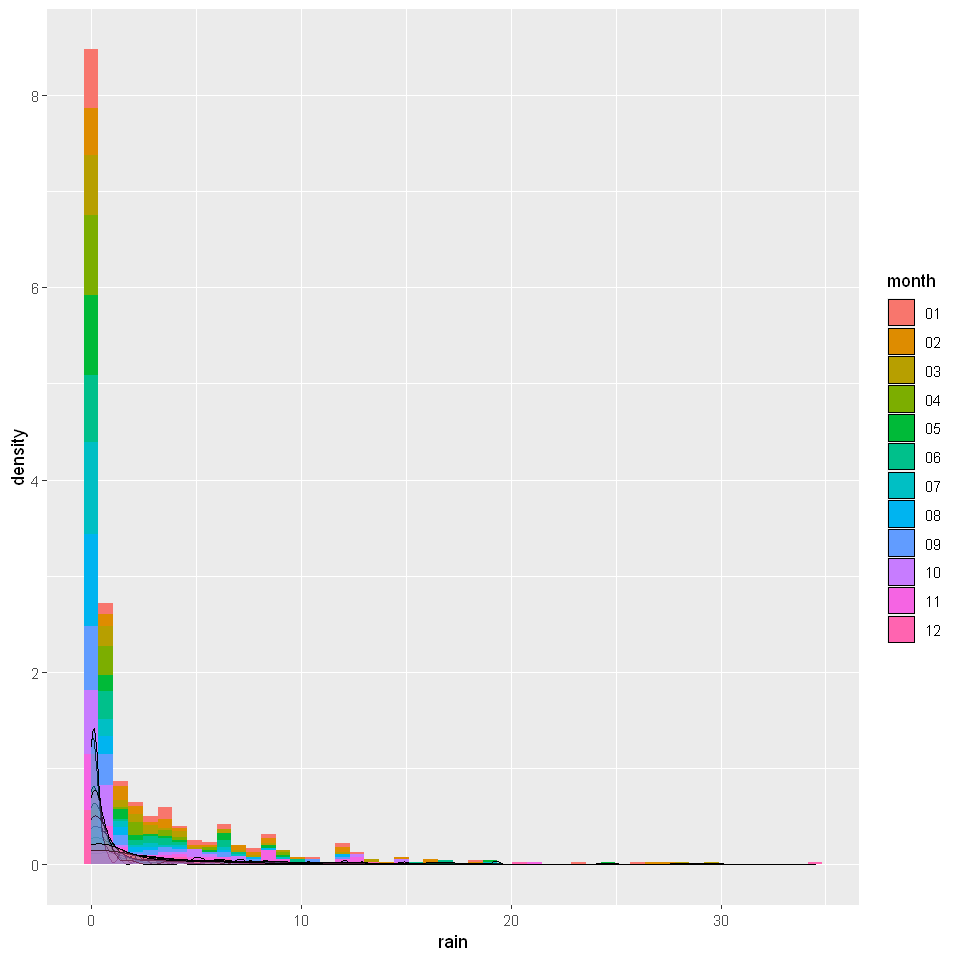

In [11]:
options(repr.plot.width = 8, repr.plot.height = 8)
ggplot(data = rain, aes_string(x = "rain", fill = 'month')) + 
    geom_histogram(aes(y = ..density..), bins = 50) + 
    geom_density(alpha =0.26)

## 1.3. Histograms and the distributions of variables

We plot as below the histograms of all quantitative variables to have an insight of the distributions of these variables

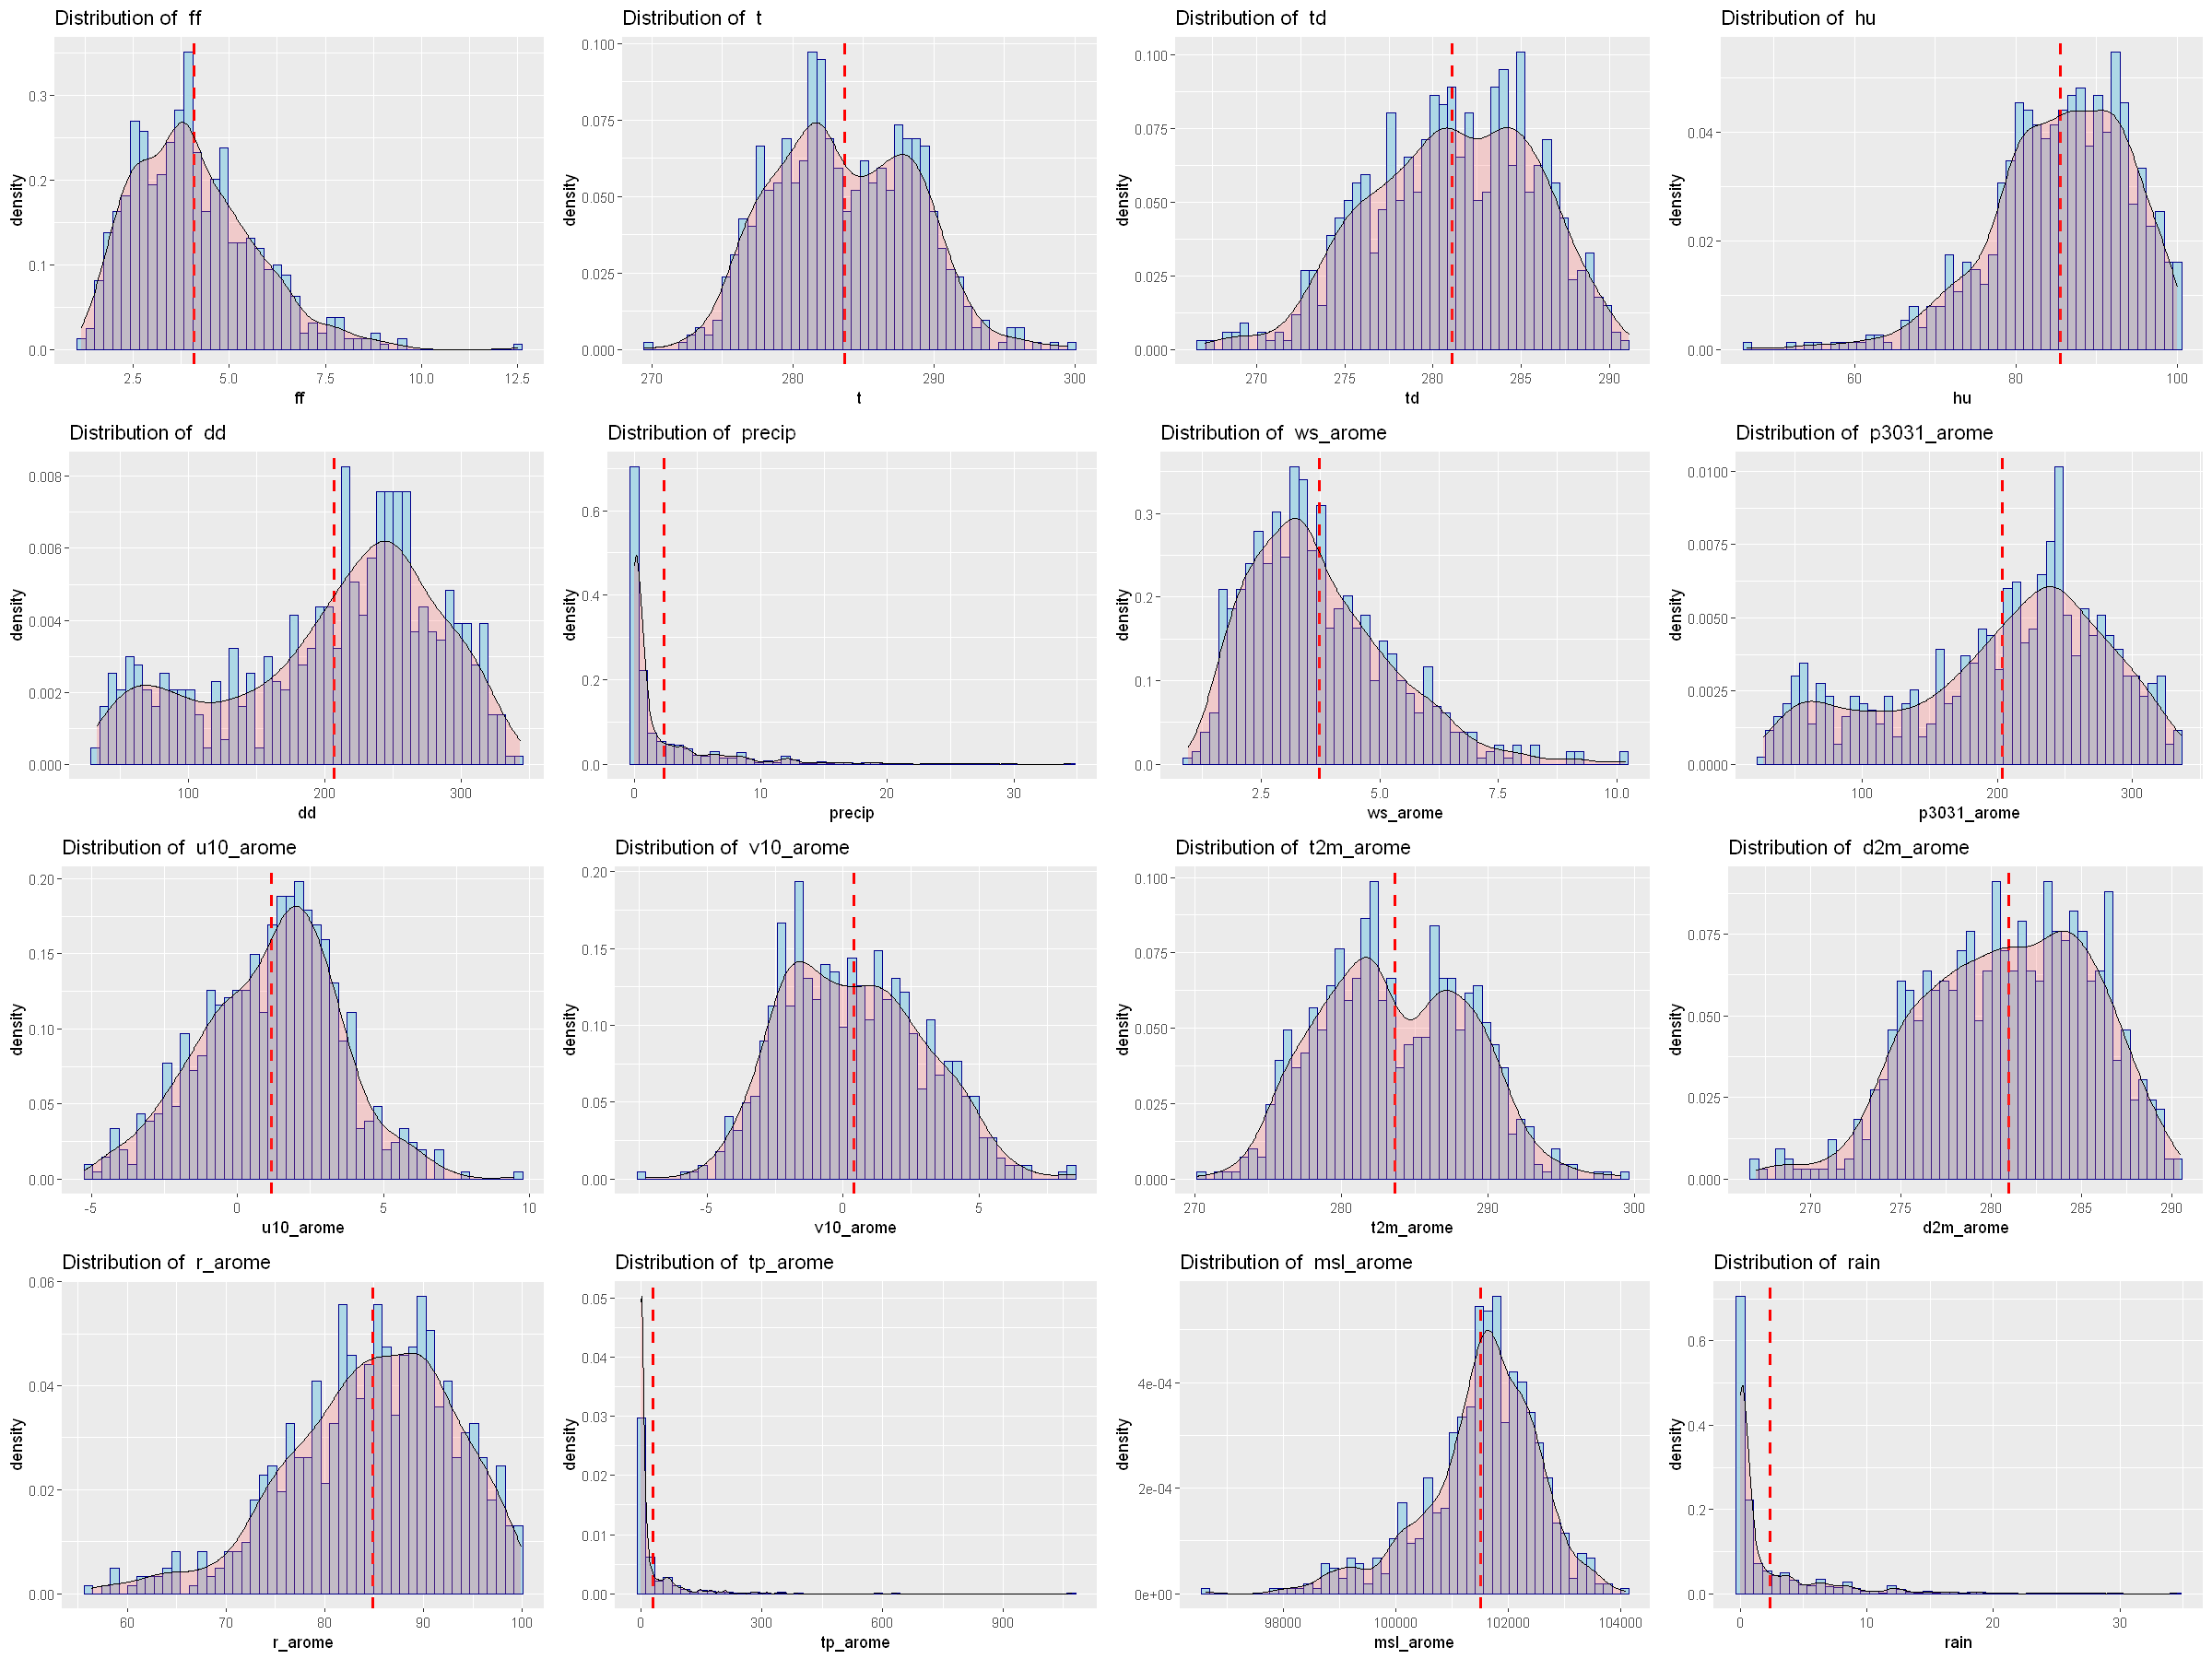

In [12]:
# Use lapply 
my_plots_list <- lapply(num_var, function(each_variable) {
  mean_val = mean(rain[, each_variable])[[1]]
  ggplot(data = rain, aes_string(x = each_variable)) + # Create a graphic object by ggplot  
    geom_histogram(aes(y = ..density..), bins = 50, color = "darkblue", fill="lightblue") +  # Add histogram 
    geom_vline(aes(xintercept = mean_val), color="red", linetype="dashed", size=1) +  # Add the mean (vertical line)
    geom_density(alpha=.25, fill="#FF6666") +   # Add the density approximation
    ggtitle(paste("Distribution of ",each_variable))
})

options(repr.plot.width = 20, repr.plot.height = 15)
gridExtra::grid.arrange(grobs = my_plots_list, ncol = 4)

From these histograms, we can remark that the distribution of some variables are not summetric. So we propose here some elementary transformations to make some distributions more symmetric and more "gaussian" 

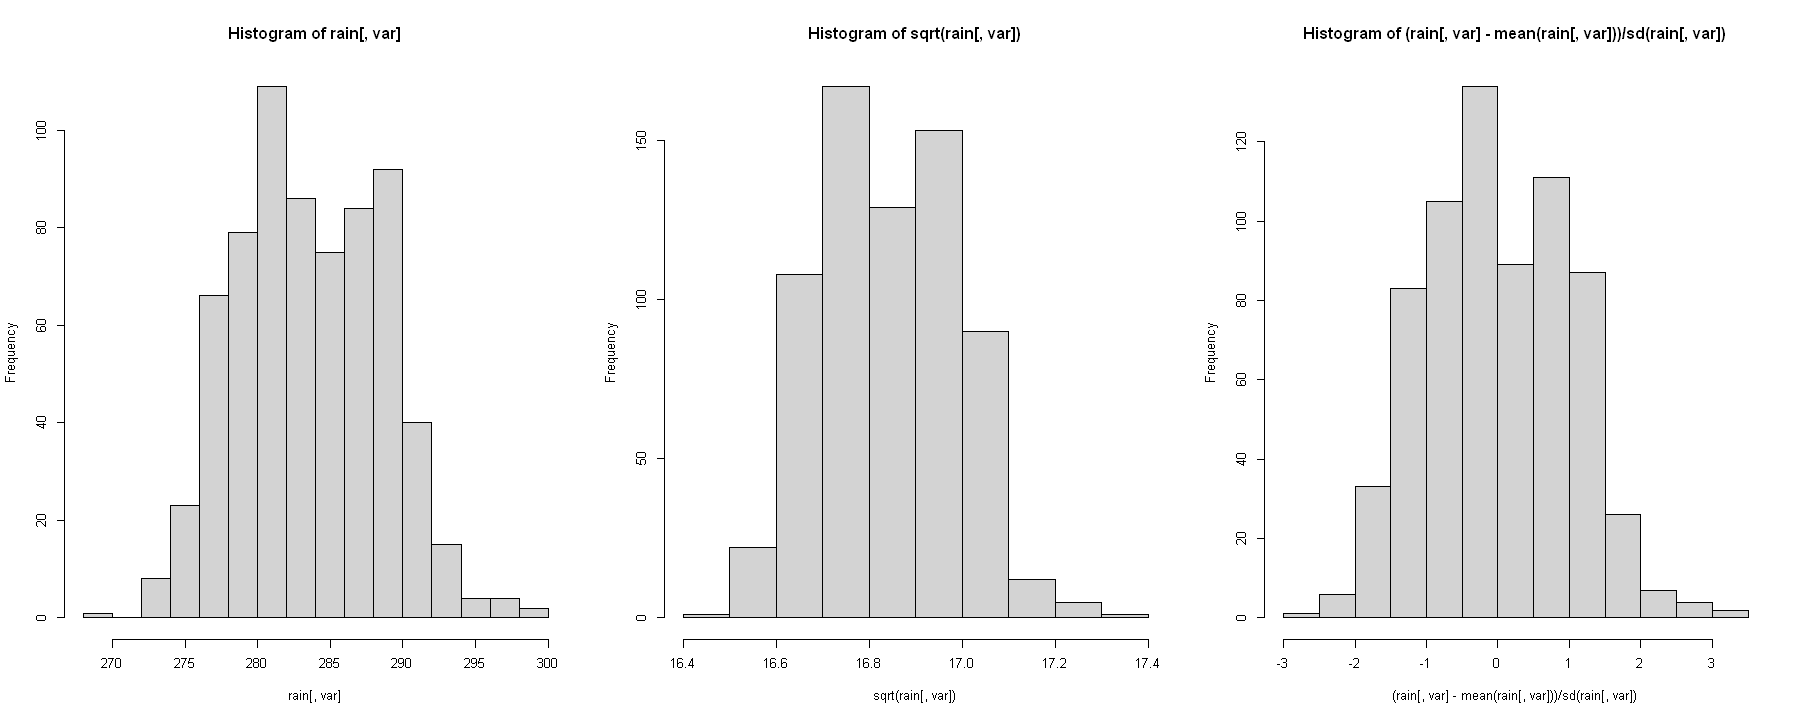

In [13]:
par(mfrow = c(1, 3))
options(repr.plot.width = 15, repr.plot.height = 6)
var = 't'
hist(rain[,var])
hist(sqrt(rain[,var]))
hist((rain[,var] - mean(rain[,var]))/sd(rain[,var]))

In [14]:
rain[, "precip"] <- log(rain[, "precip"] + 1)
rain[, "tp_arome"] <- log(rain[, "tp_arome"] + 1)
rain[, "rain_log"] <- log(rain[, "rain"] + 1)

In [15]:
colnames(rain)[colnames(rain) == "precip"] = "precip_log"
colnames(rain)[colnames(rain) == "tp_arome"] = "tp_arome_log"

In [16]:
num_var[num_var == 'precip'] = "precip_log"
num_var[num_var == 'tp_arome'] = "tp_arome_log"
num_var = c(num_var, 'rain_log')
num_var

[1] "ff"           "t"            "td"           "hu"           "dd"          
 [6] "precip_log"   "ws_arome"     "p3031_arome"  "u10_arome"    "v10_arome"   
[11] "t2m_arome"    "d2m_arome"    "r_arome"      "tp_arome_log" "msl_arome"   
[16] "rain"         "rain_log"

In [17]:
head(rain)

,month,ff,t,td,hu,dd,precip_log,ws_arome,p3031_arome,u10_arome,v10_arome,t2m_arome,d2m_arome,r_arome,tp_arome_log,msl_arome,rain,rain_class,rain_log
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,06,3.945000,289.4087,285.2771,78.78333,246.7500,0.0000000,3.663785,244.2995,3.0385028,1.4163599,289.2323,285.1709,79.03778,1.2024547,101672.9,0.2,low_rain,0.1823216
2,03,3.739583,276.3758,273.4225,81.70000,260.3333,0.7884574,3.328476,305.6608,2.4638858,-1.8989708,275.8087,273.6726,86.33160,2.4574876,100583.8,4.2,high_rain,1.6486586
3,07,3.273750,288.8692,286.7233,87.62083,259.0417,0.1823216,3.232380,256.0424,2.9638715,0.9856267,289.6274,286.4851,82.30103,1.7196025,101483.0,0.0,no_rain,0.0000000
4,05,1.745000,284.2887,280.2158,76.58750,216.5417,0.0000000,1.720926,139.2973,-0.2606926,-1.3976028,284.7261,280.3673,75.38412,0.6628187,102223.6,0.0,no_rain,0.0000000
5,02,5.718750,277.5279,274.5292,81.39167,285.5417,0.9555114,4.424012,285.5788,3.9400556,-1.4576058,277.7517,274.5907,80.43509,2.7015676,102416.2,0.0,no_rain,0.0000000
6,12,1.750000,277.3533,275.1396,86.20417,140.8750,0.1823216,1.780965,157.8312,0.1446032,0.6620992,275.2941,273.0910,85.25869,0.1872953,103463.9,0.2,low_rain,0.1823216


Moreover, we can see that the data are in different range, for example, ... So we need to normalize the data

### Data normalization

We will normalize the data to have zero mean and unit standard deviation for each explicative varariable

In [18]:
num_var

[1] "ff"           "t"            "td"           "hu"           "dd"          
 [6] "precip_log"   "ws_arome"     "p3031_arome"  "u10_arome"    "v10_arome"   
[11] "t2m_arome"    "d2m_arome"    "r_arome"      "tp_arome_log" "msl_arome"   
[16] "rain"         "rain_log"

**Remark:** We will not scale the reponse. 

In [19]:
# Explicative variables
exp_var = setdiff(names(rain), c("rain", "rain_class", "rain_log"))
exp_num = setdiff(exp_var, c("month"))

In [20]:
exp_var

[1] "month"        "ff"           "t"            "td"           "hu"          
 [6] "dd"           "precip_log"   "ws_arome"     "p3031_arome"  "u10_arome"   
[11] "v10_arome"    "t2m_arome"    "d2m_arome"    "r_arome"      "tp_arome_log"
[16] "msl_arome"

In [21]:
rain_scaled = rain
rain_scaled[exp_num] = scale(rain_scaled[exp_num], center = TRUE, scale = TRUE)   

In [22]:
head(rain_scaled)

,month,ff,t,td,hu,dd,precip_log,ws_arome,p3031_arome,u10_arome,v10_arome,t2m_arome,d2m_arome,r_arome,tp_arome_log,msl_arome,rain,rain_class,rain_log
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,06,-0.08621305,1.164777,0.9105351,-0.79823471,0.5200537,-0.82039852,-0.03659526,0.5297853,0.8019527,0.4007581,1.1187027,0.9208535,-0.69899841,-0.36213432,0.15330096,0.2,low_rain,0.1823216
2,03,-0.21529566,-1.471529,-1.6613332,-0.45471837,0.6958876,0.07889537,-0.25766440,1.3231433,0.5568977,-0.8887086,-1.5527261,-1.5824152,0.18145591,0.35351310,-0.90549141,4.2,high_rain,1.6486586
3,07,-0.50802255,1.055629,1.2243010,0.24261981,0.6791672,-0.61244731,-0.32102085,0.6816127,0.7701249,0.2332284,1.1973334,1.2069740,-0.30508384,-0.06724522,-0.03128312,0.0,no_rain,0.0000000
4,05,-1.46867996,0.129100,-0.1875101,-1.05685344,0.1290120,-0.82039852,-1.31752316,-0.8278199,-0.6050438,-0.6937063,0.2219311,-0.1249160,-1.14004178,-0.66984666,0.68871591,0.0,no_rain,0.0000000
5,02,1.02840090,-1.238485,-1.4212403,-0.49103295,1.0222052,0.26943290,0.46462317,1.0634977,1.1864348,-0.7170438,-1.1660485,-1.3825454,-0.53032676,0.49269296,0.87599099,0.0,no_rain,0.0000000
6,12,-1.46553799,-1.273800,-1.2888096,0.07576901,-0.8504800,-0.61244731,-1.27793928,-0.5881897,-0.4321987,0.1073955,-1.6551375,-1.7090362,0.05194278,-0.94100062,1.89456910,0.2,low_rain,0.1823216


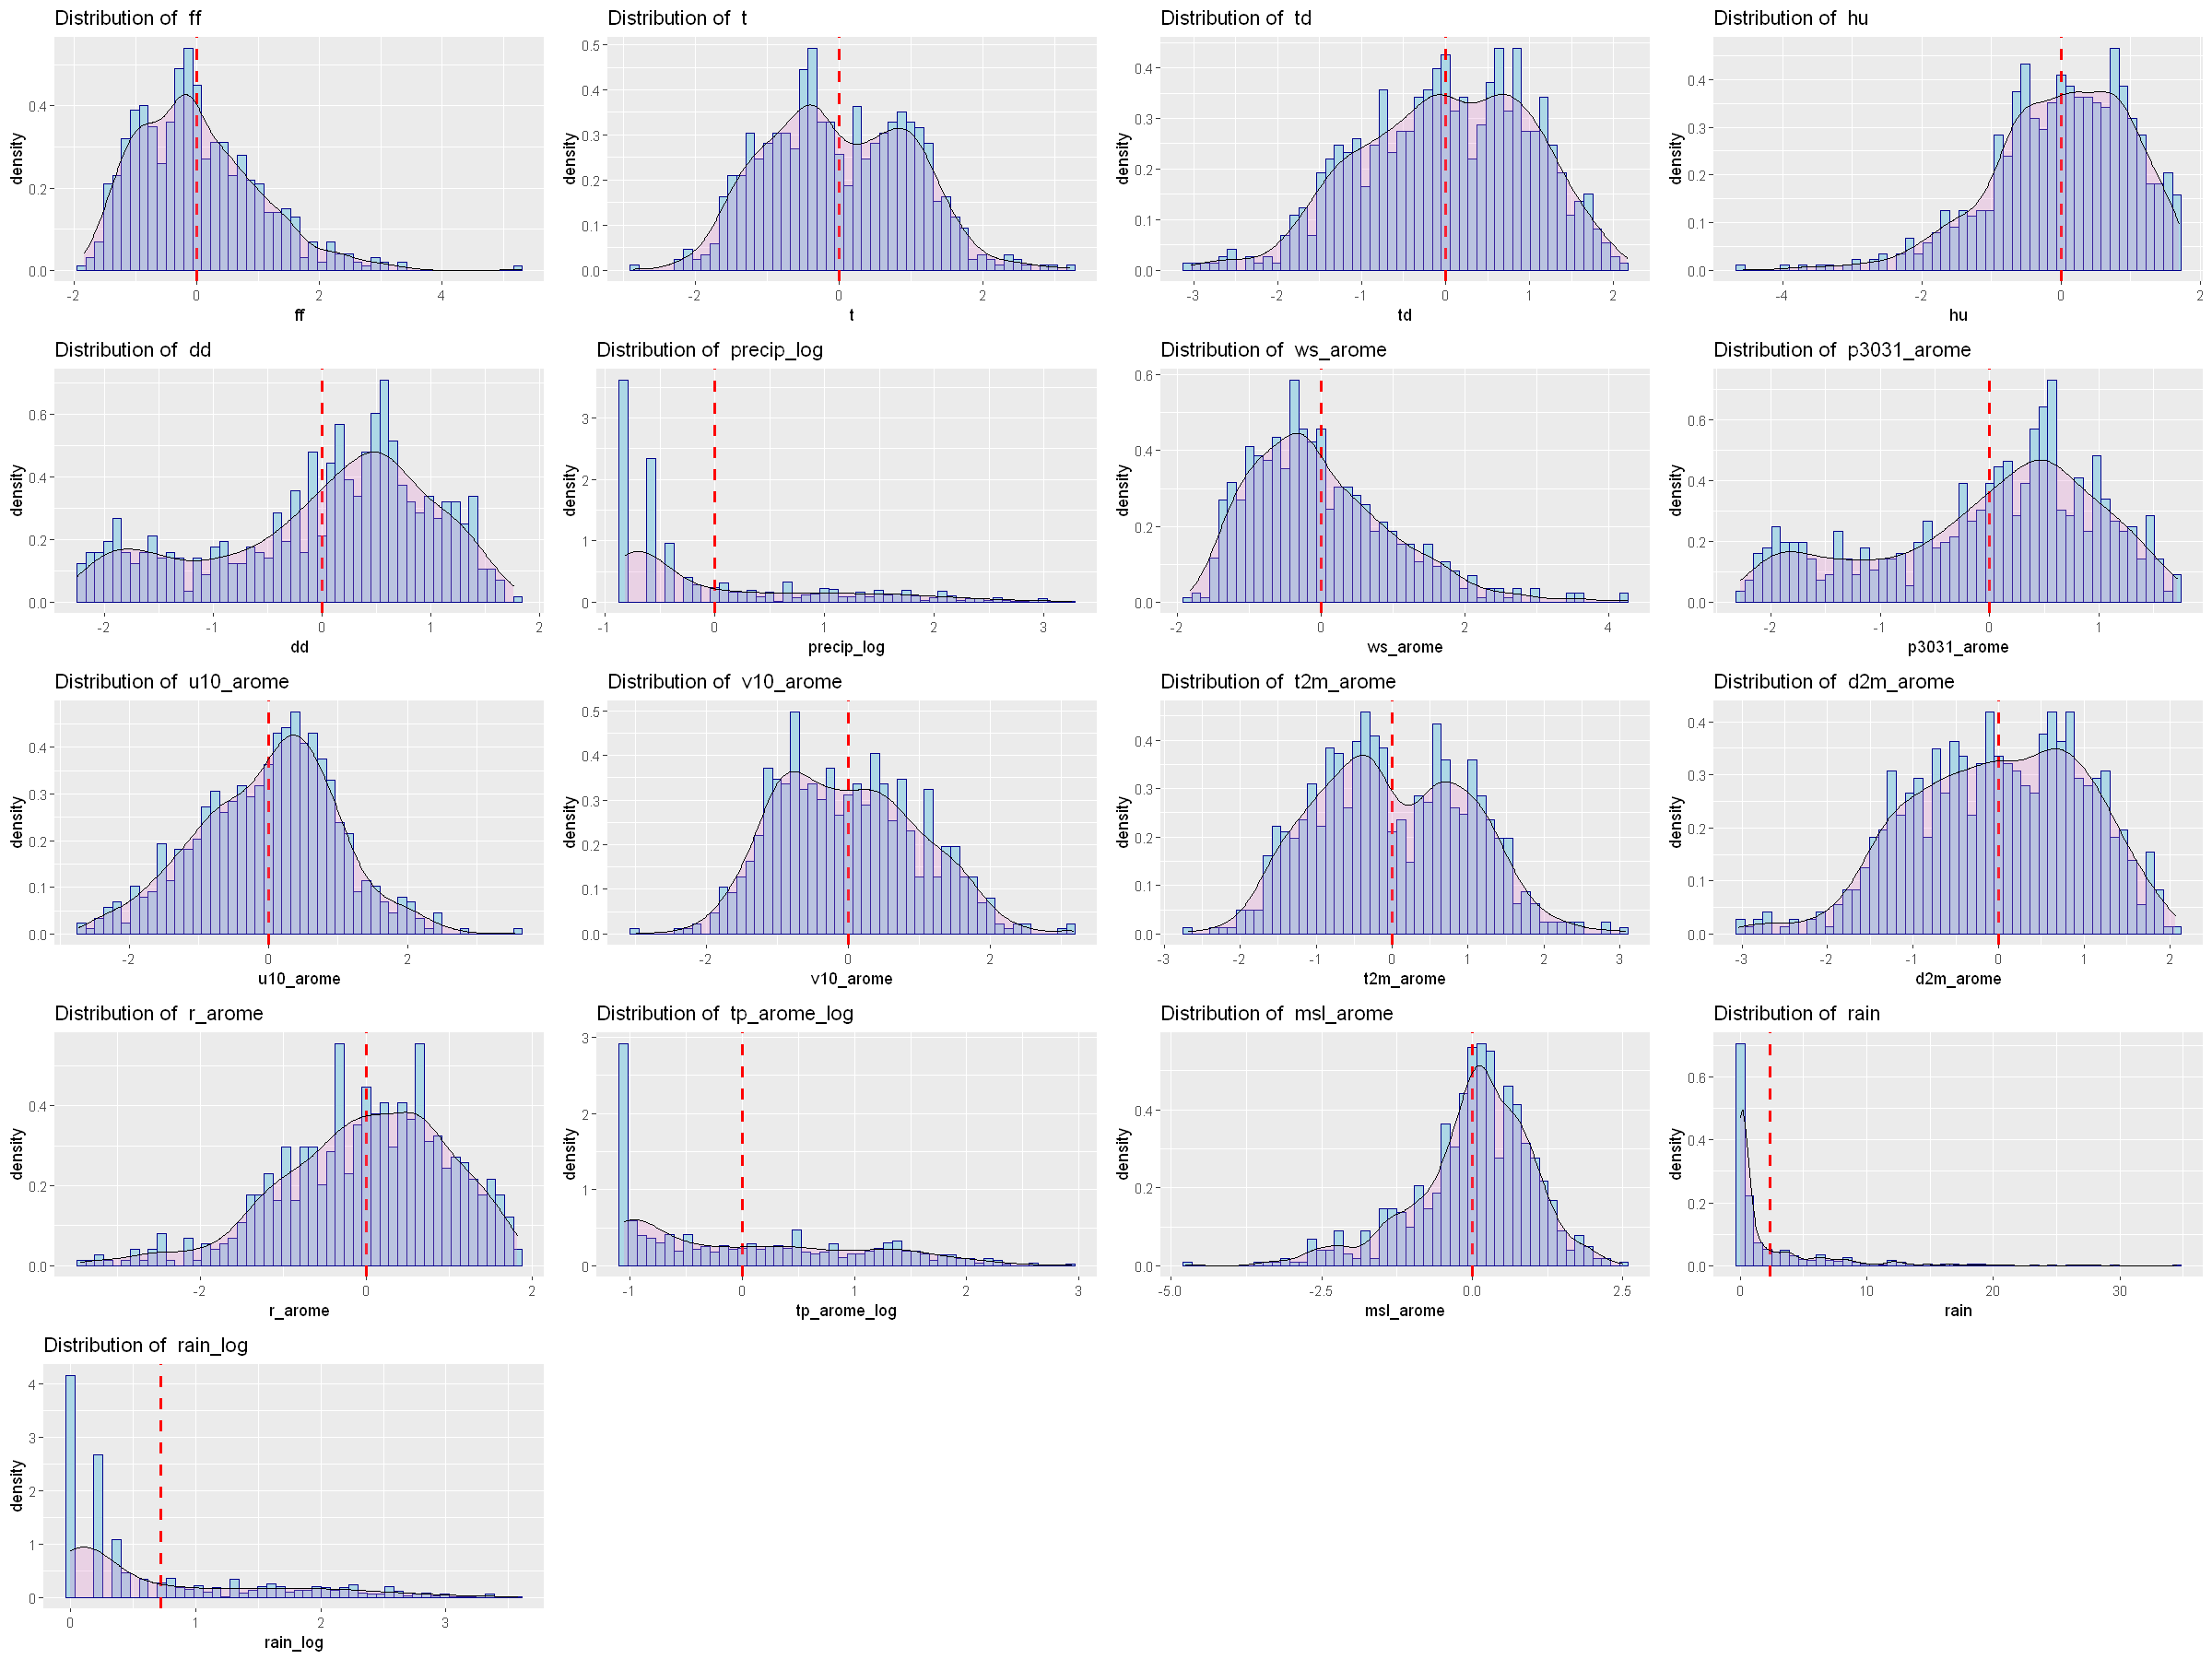

In [23]:
hist_list_scaled <- lapply(num_var, function(each_variable) {
  mean_val = mean(rain_scaled[, each_variable])[[1]]
  ggplot(data = rain_scaled, aes_string(x = each_variable)) + # Create a graphic object by ggplot  
    geom_histogram(aes(y = ..density..), bins = 50, color = "darkblue", fill="lightblue") +  # Add histogram 
    geom_vline(aes(xintercept = mean_val), color="red", linetype="dashed", size=1) +  # Add the mean (vertical line)
    geom_density(alpha=.25, fill="#e284ce") +   # Add the density approximation
    ggtitle(paste("Distribution of ",each_variable))
})

options(repr.plot.width = 20, repr.plot.height = 15)
gridExtra::grid.arrange(grobs = hist_list_scaled, ncol = 4)

### Deal with outliers

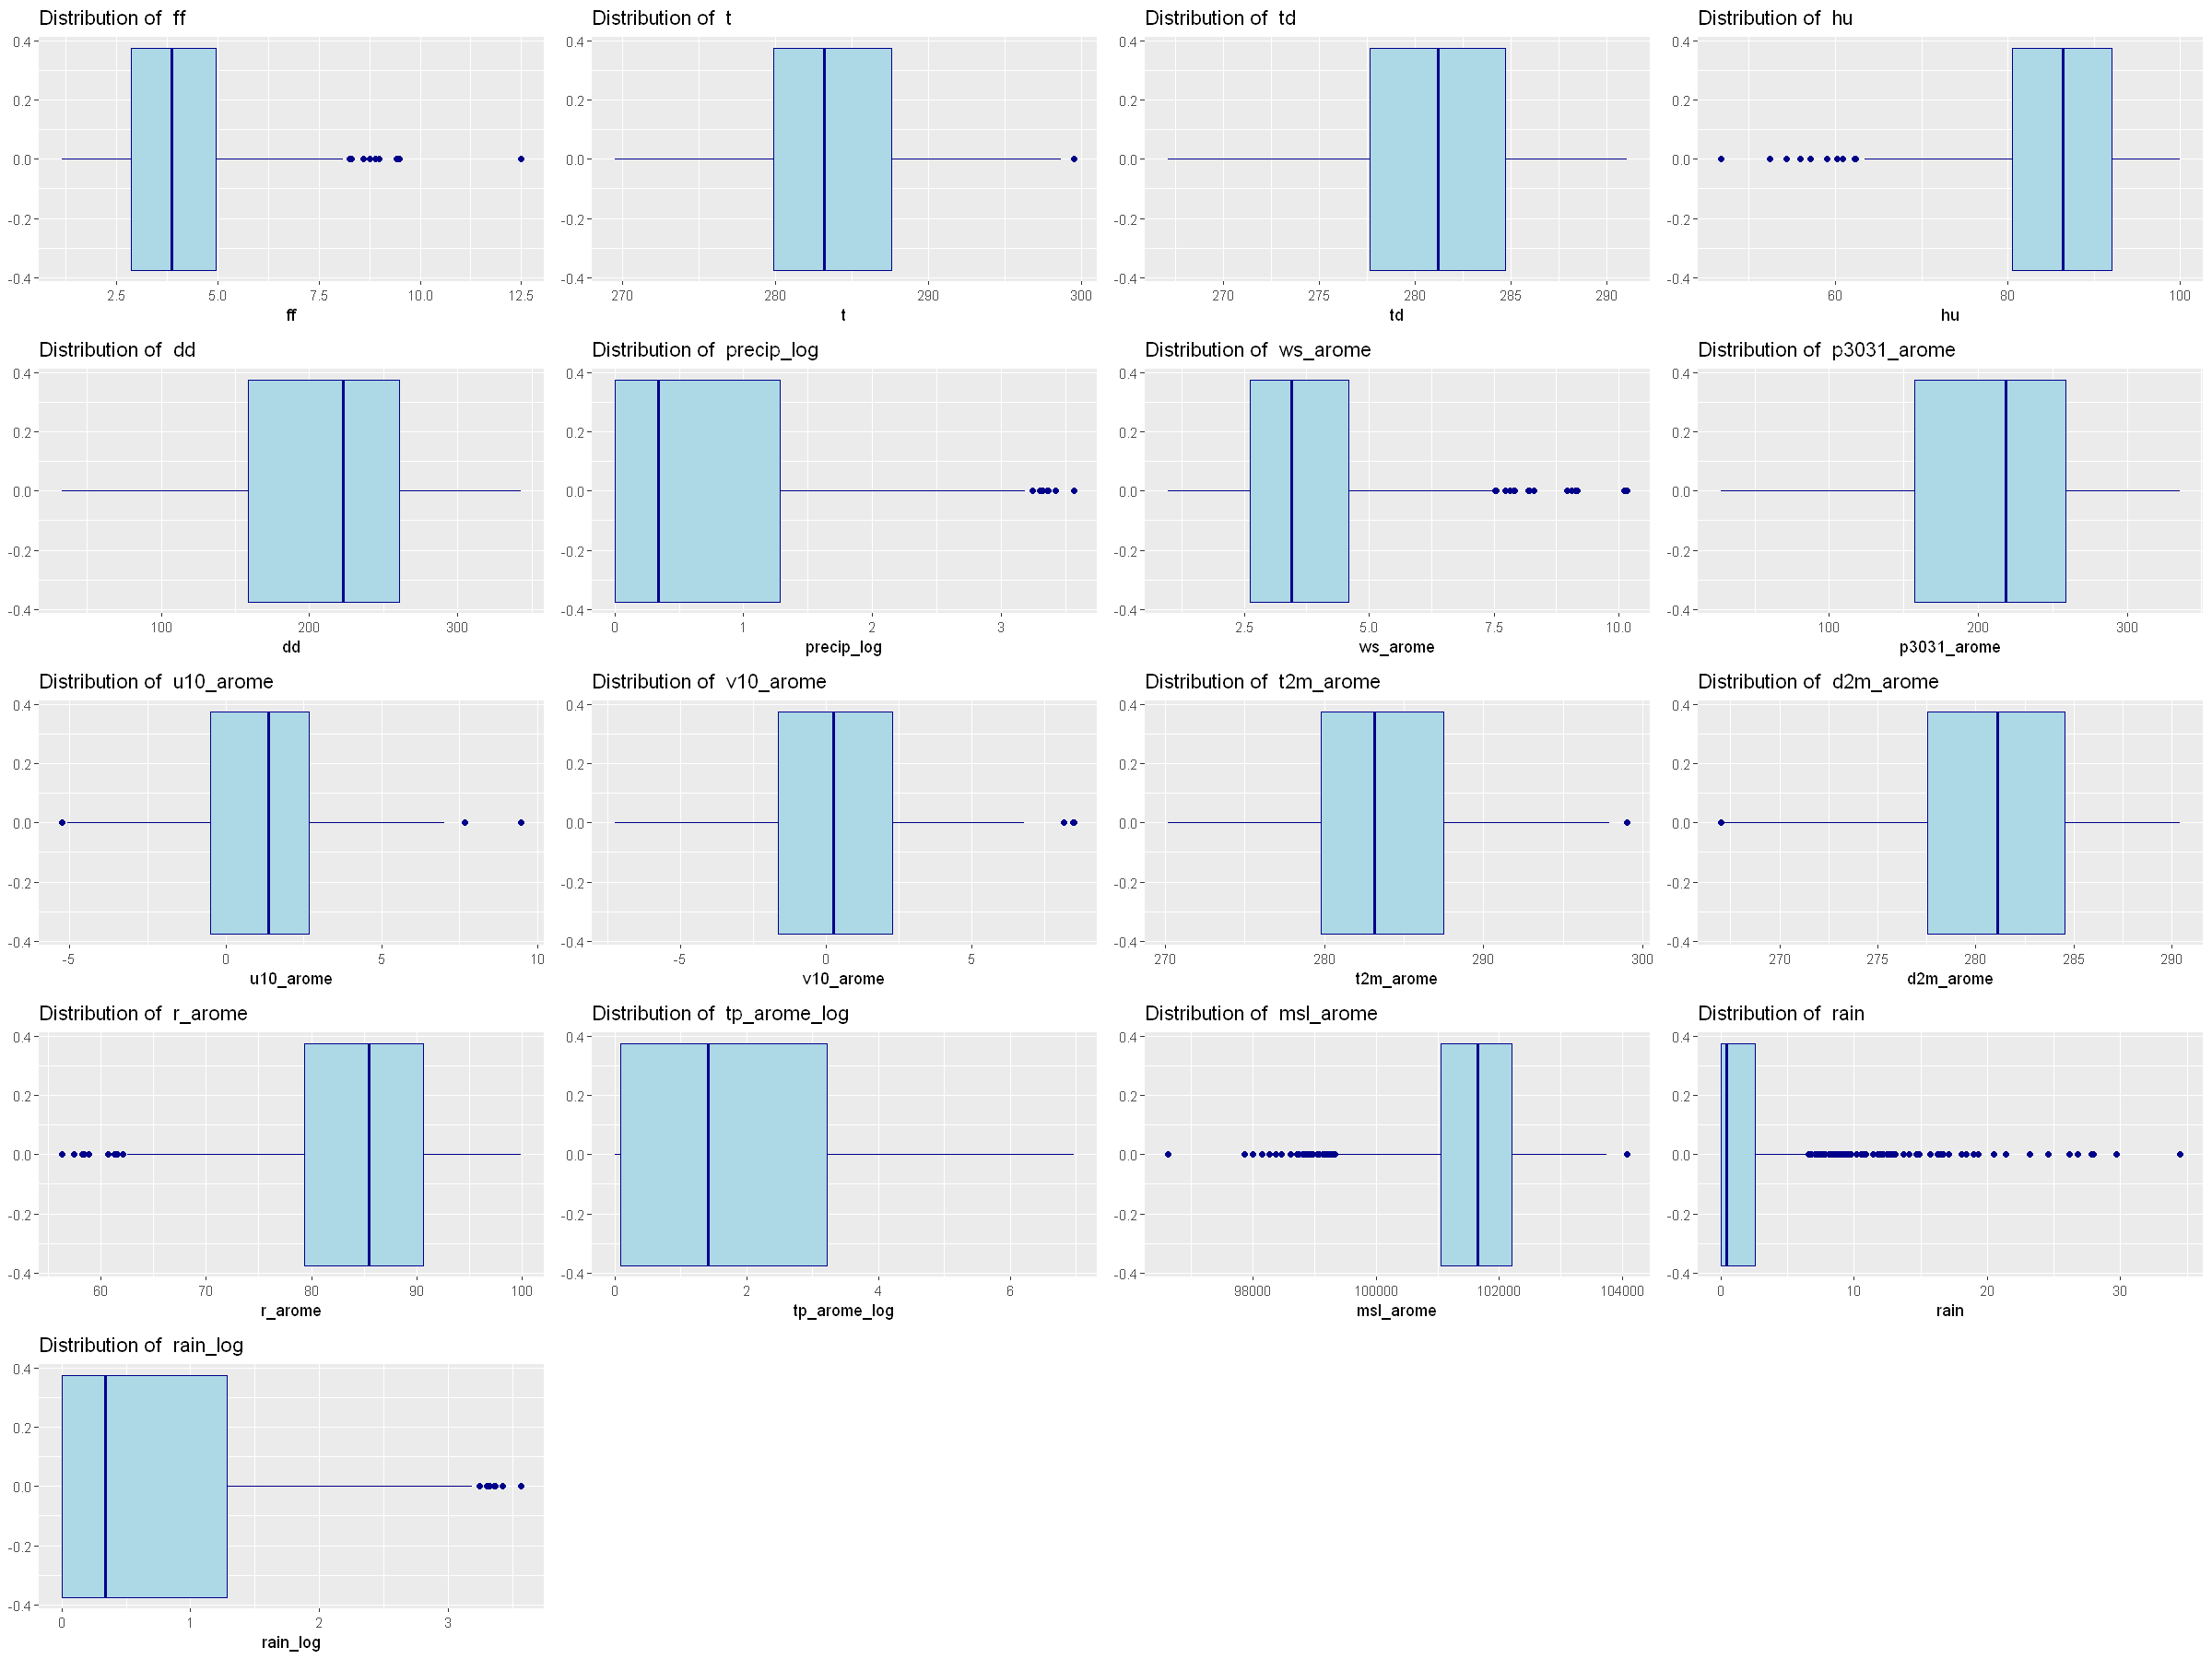

In [24]:
box_list <- lapply(num_var, function(each_variable) {
  mean_val = mean(rain[, each_variable])[[1]]
  ggplot(data = rain, aes_string(x = each_variable)) + # Create a graphic object by ggplot  
    geom_boxplot(color = "darkblue", fill = "lightblue") +
    ggtitle(paste("Distribution of ", each_variable))
})

options(repr.plot.width = 20, repr.plot.height = 15)
gridExtra::grid.arrange(grobs = box_list, ncol = 4)

There are less outliers than original data.

### Scatter plot

In [25]:
num_var

[1] "ff"           "t"            "td"           "hu"           "dd"          
 [6] "precip_log"   "ws_arome"     "p3031_arome"  "u10_arome"    "v10_arome"   
[11] "t2m_arome"    "d2m_arome"    "r_arome"      "tp_arome_log" "msl_arome"   
[16] "rain"         "rain_log"

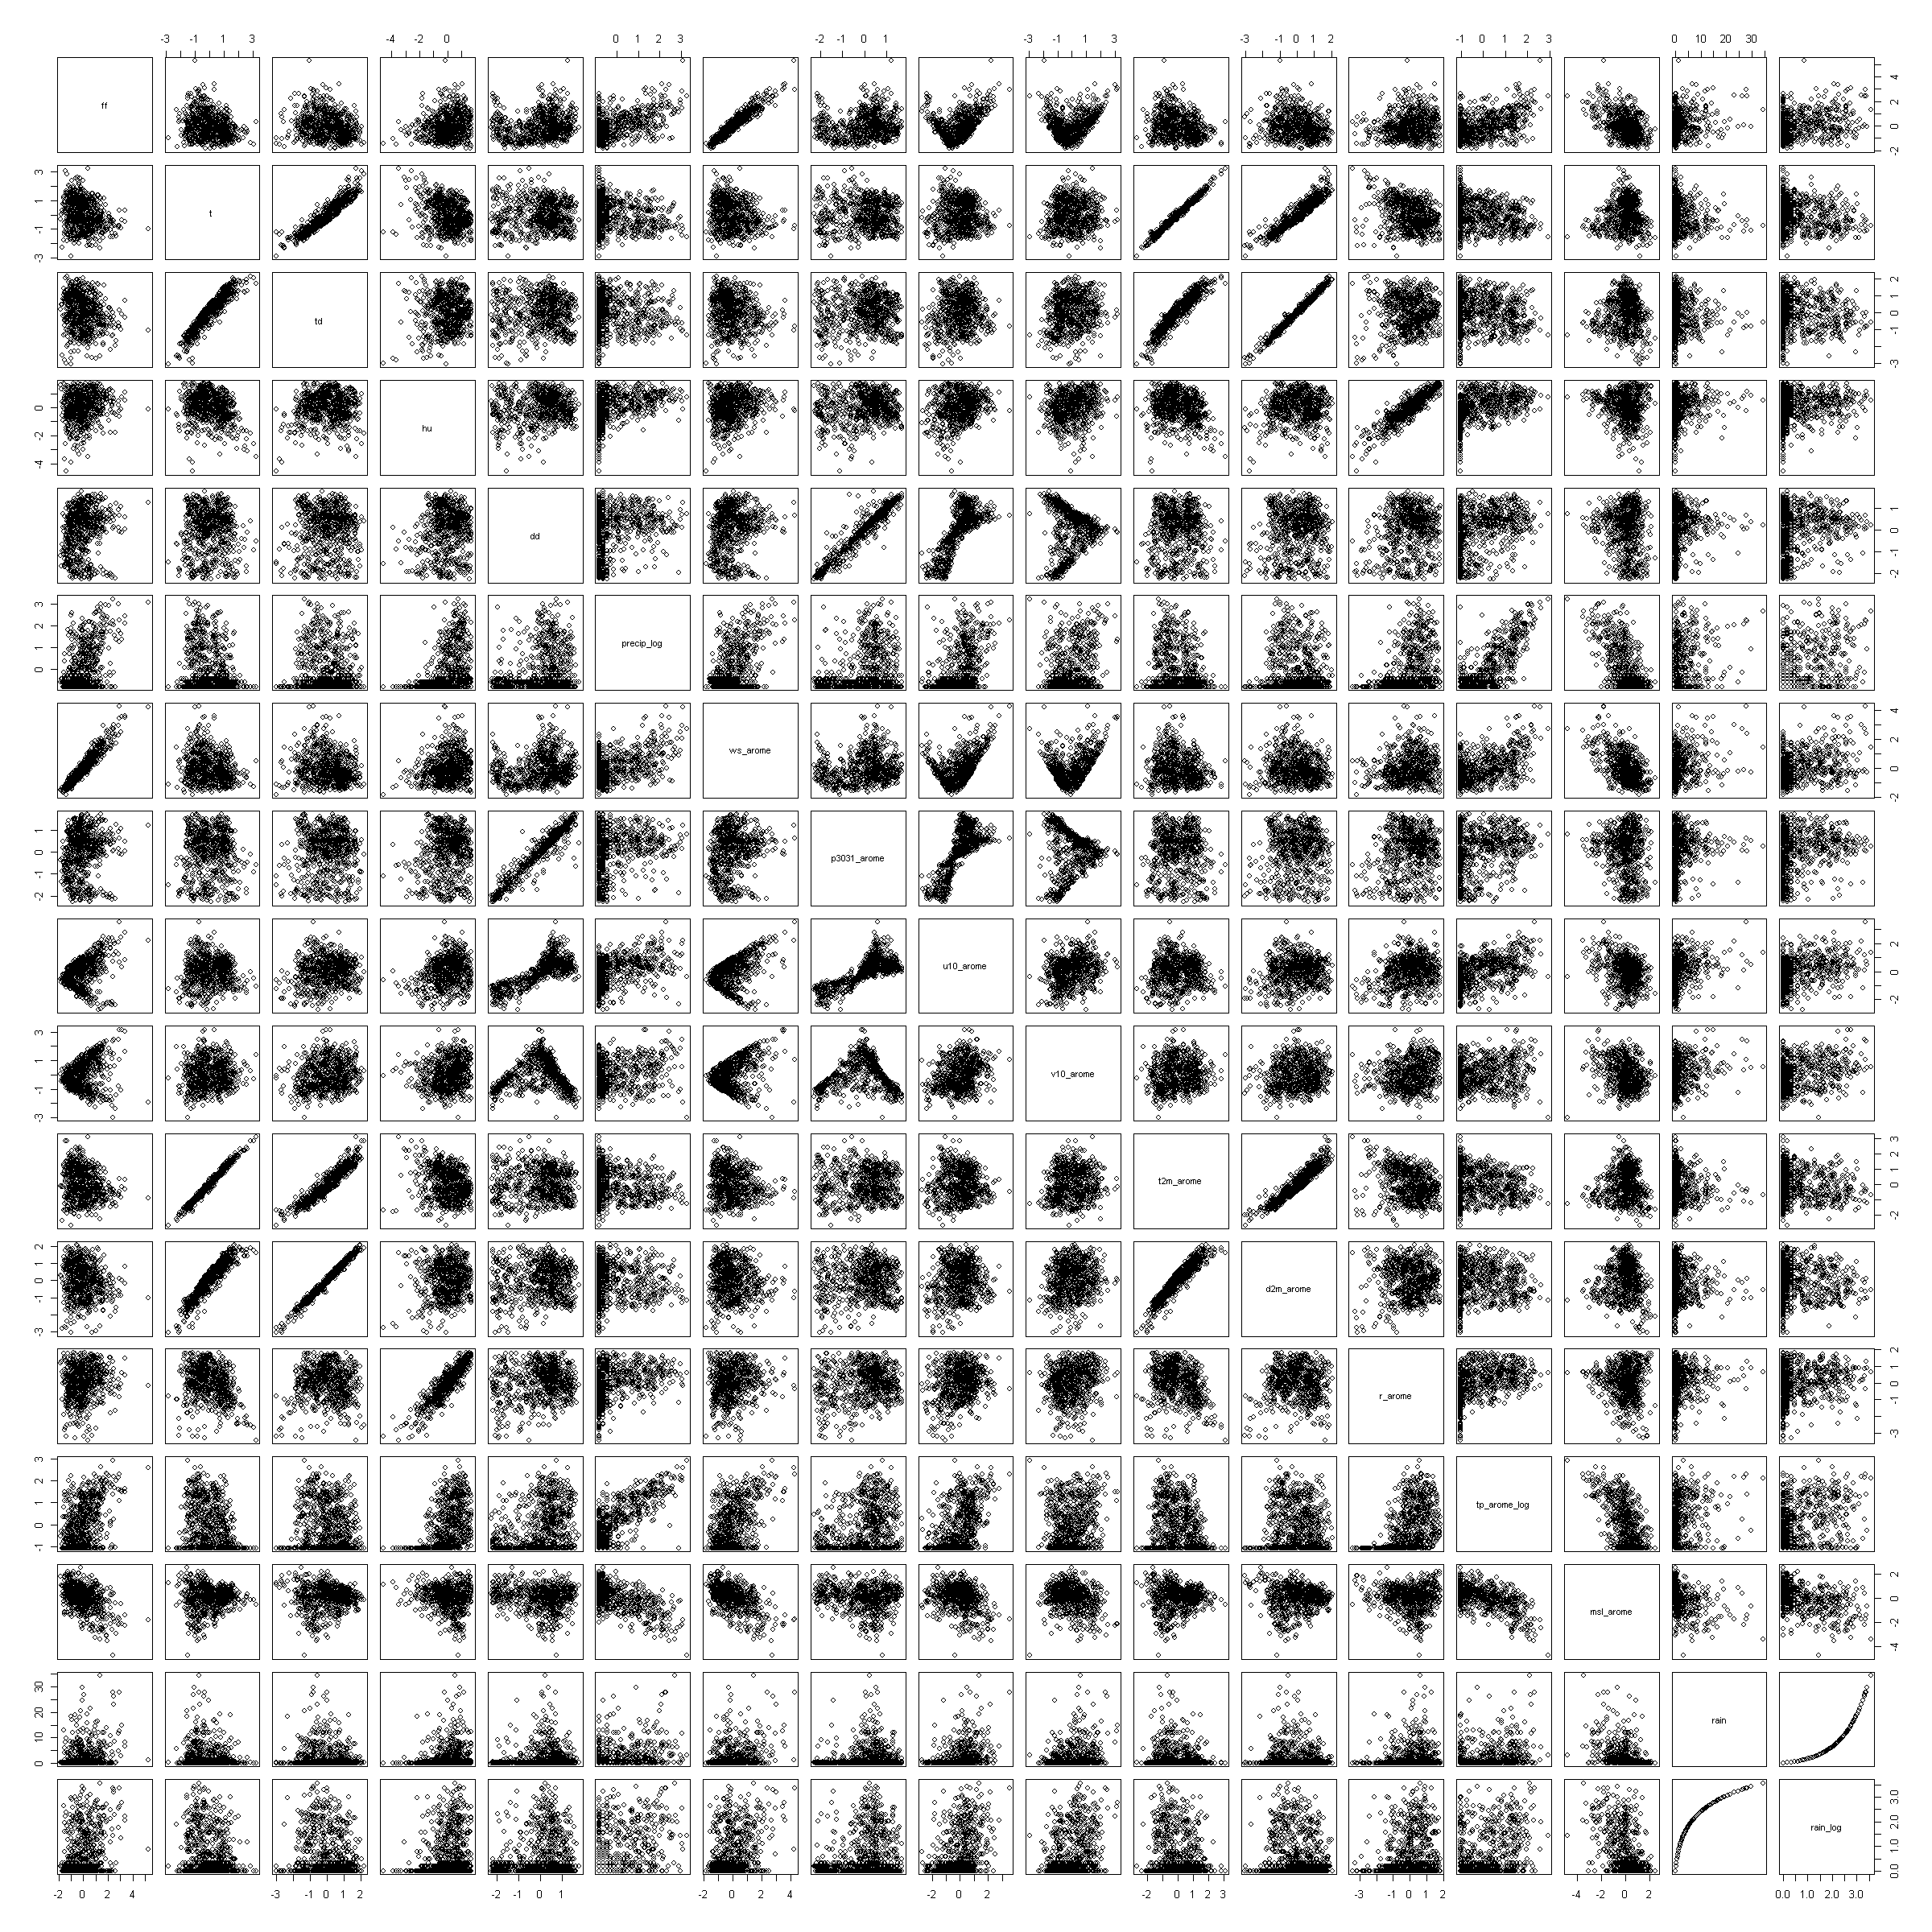

In [26]:
options(repr.plot.width = 20, repr.plot.height = 20)
pairs(rain_scaled[,num_var])

In [27]:
library(ggcorrplot)

Warning message:
"package 'ggcorrplot' was built under R version 4.0.5"


In [28]:
length(num_var)

[1] 17

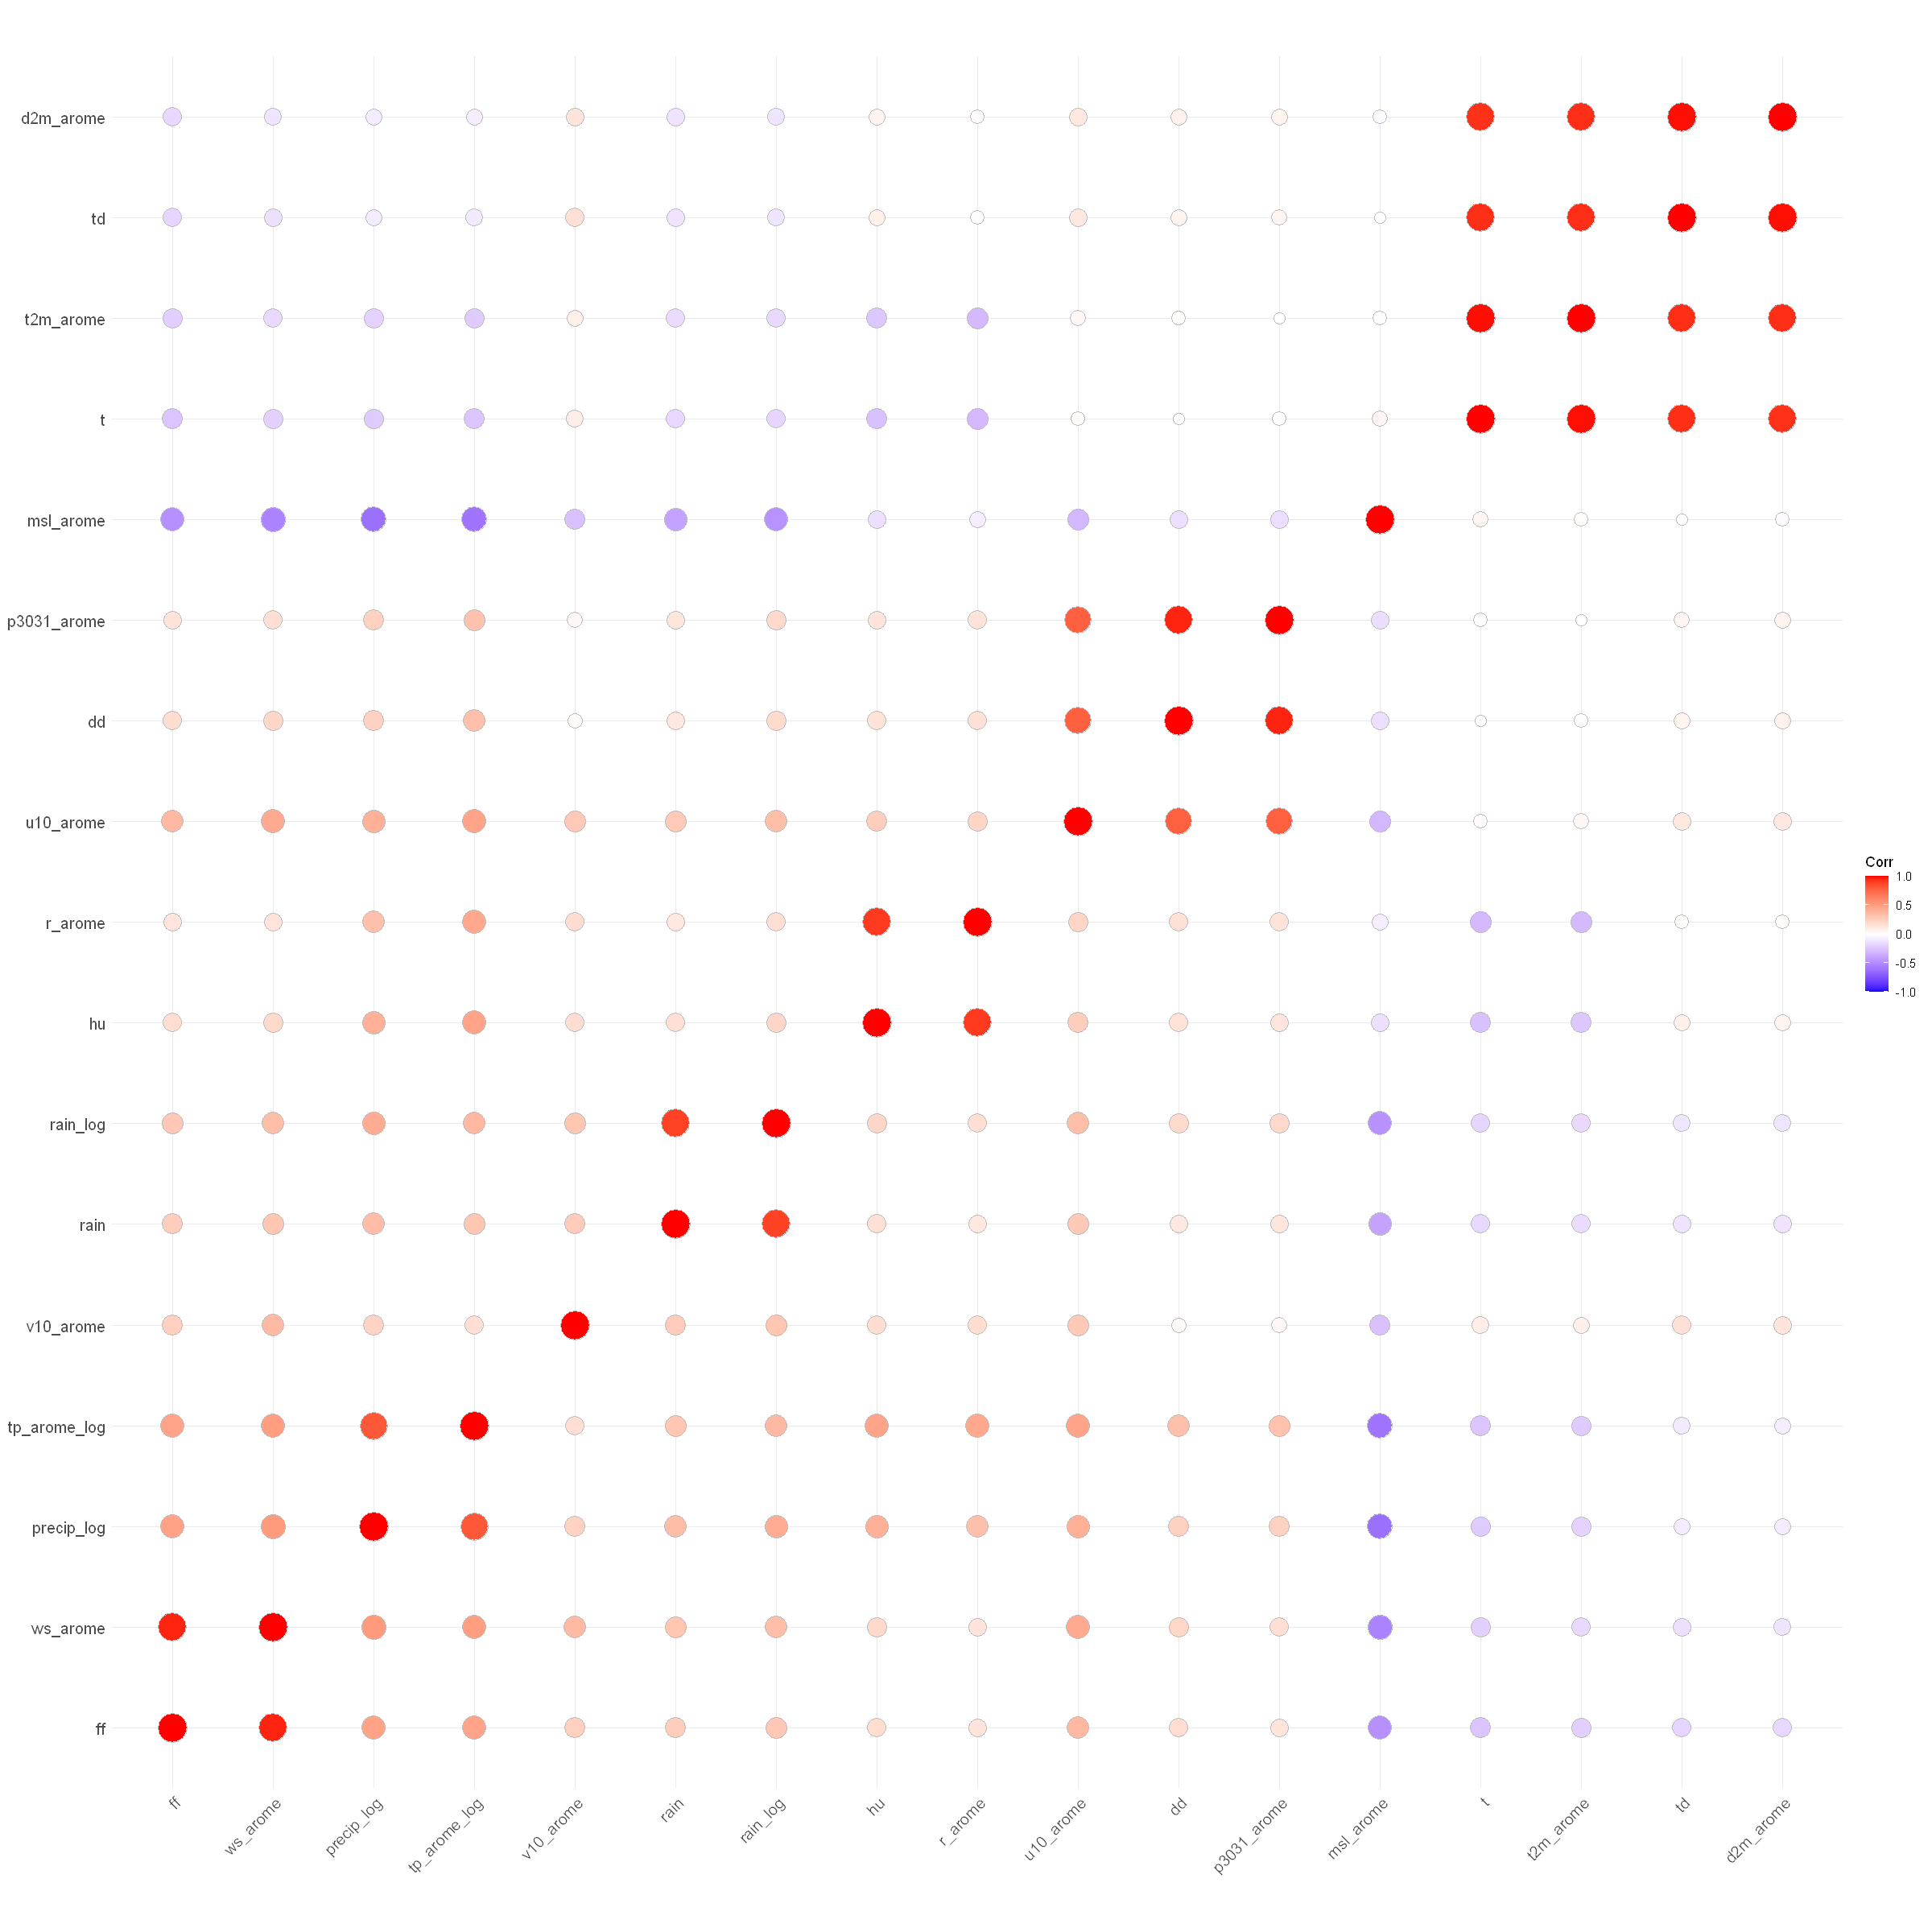

In [29]:

corr = cor(rain[,num_var])
ggcorrplot(corr,hc.order = TRUE, method = "circle")

# II. Machine Learning model for prediction

### Proposed outline

1. Regression
    Linear, logistic, Lasso and Rigde, ...

2. SVM  
    SVM, Kernel trick, ...

3. Decision tree, random forest

4. Neural Network

## 0. Premilary

### 0.1. Training set and Test test split

In [30]:
set.seed(42)

test.ratio = .2   
n_pop = nrow(rain_scaled) 
n_test = ceiling(n_pop * test.ratio) 
test_i = sample(1:n_pop, n_test)
train_i = setdiff(1:n_pop, test_i) 

In [31]:
length(names(rain_scaled))

[1] 19

In [32]:
head(rain_scaled)

,month,ff,t,td,hu,dd,precip_log,ws_arome,p3031_arome,u10_arome,v10_arome,t2m_arome,d2m_arome,r_arome,tp_arome_log,msl_arome,rain,rain_class,rain_log
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,06,-0.08621305,1.164777,0.9105351,-0.79823471,0.5200537,-0.82039852,-0.03659526,0.5297853,0.8019527,0.4007581,1.1187027,0.9208535,-0.69899841,-0.36213432,0.15330096,0.2,low_rain,0.1823216
2,03,-0.21529566,-1.471529,-1.6613332,-0.45471837,0.6958876,0.07889537,-0.25766440,1.3231433,0.5568977,-0.8887086,-1.5527261,-1.5824152,0.18145591,0.35351310,-0.90549141,4.2,high_rain,1.6486586
3,07,-0.50802255,1.055629,1.2243010,0.24261981,0.6791672,-0.61244731,-0.32102085,0.6816127,0.7701249,0.2332284,1.1973334,1.2069740,-0.30508384,-0.06724522,-0.03128312,0.0,no_rain,0.0000000
4,05,-1.46867996,0.129100,-0.1875101,-1.05685344,0.1290120,-0.82039852,-1.31752316,-0.8278199,-0.6050438,-0.6937063,0.2219311,-0.1249160,-1.14004178,-0.66984666,0.68871591,0.0,no_rain,0.0000000
5,02,1.02840090,-1.238485,-1.4212403,-0.49103295,1.0222052,0.26943290,0.46462317,1.0634977,1.1864348,-0.7170438,-1.1660485,-1.3825454,-0.53032676,0.49269296,0.87599099,0.0,no_rain,0.0000000
6,12,-1.46553799,-1.273800,-1.2888096,0.07576901,-0.8504800,-0.61244731,-1.27793928,-0.5881897,-0.4321987,0.1073955,-1.6551375,-1.7090362,0.05194278,-0.94100062,1.89456910,0.2,low_rain,0.1823216


In [33]:
names(rain_scaled)

[1] "month"        "ff"           "t"            "td"           "hu"          
 [6] "dd"           "precip_log"   "ws_arome"     "p3031_arome"  "u10_arome"   
[11] "v10_arome"    "t2m_arome"    "d2m_arome"    "r_arome"      "tp_arome_log"
[16] "msl_arome"    "rain"         "rain_class"   "rain_log"

In [34]:
# Explicative variables
reponse = c("rain", "rain_class", "rain_log")
exp_var = setdiff(names(rain_scaled), reponse)

train_set = rain_scaled[train_i, ]
y_train_log = rain_scaled[train_i, "rain_log"]
y_train = rain_scaled[train_i, "rain"]
y_train_class = rain_scaled[train_i, "rain_class"]

test_set = rain_scaled[test_i, ]
y_test_log = rain_scaled[test_i, "rain_log"]
y_test = rain_scaled[test_i, "rain"]
y_test_class = rain_scaled[test_i, "rain_class"]


Beside, for convenience, wz define a vetor of names of all the explicative variables and quantitative-explicative variables

In [35]:
exp_var = setdiff(names(rain), c("rain", "rain_class", "rain_log"))
exp_num = setdiff(exp_var, c("month"))
exp_var
exp_num 

[1] "month"        "ff"           "t"            "td"           "hu"          
 [6] "dd"           "precip_log"   "ws_arome"     "p3031_arome"  "u10_arome"   
[11] "v10_arome"    "t2m_arome"    "d2m_arome"    "r_arome"      "tp_arome_log"
[16] "msl_arome"

[1] "ff"           "t"            "td"           "hu"           "dd"          
 [6] "precip_log"   "ws_arome"     "p3031_arome"  "u10_arome"    "v10_arome"   
[11] "t2m_arome"    "d2m_arome"    "r_arome"      "tp_arome_log" "msl_arome"

### 0.1. Performance Evaluation methods and Metrics

We define as below some utility functions for comparing the performance of different methods

#### Function to calculate error using MAPE

Error is calculated using 
$$MAPE = \frac{100}{n} \sum_{i =1}^{n} \frac{|Y_i - \hat{Y_i}|}{Y_i + 1}$$

Which is more robust then the $l2-norm$ for dealing with outliers

In [36]:
MAPE = function(y, y_hat){
    # y = as.numeric(y)
    # y_hat = as.numeric(y_hat)
    mape = mean(abs((y - y_hat)/y))
    return(mape)
}

#### Funtion to calculate quadratic error

In [37]:
MSE = function(y, y_hat){
    mse = mean((y - y_hat)**2)
    return(mse)
}

#### Function to transform predicted rain values in log scale to original sclale 

In [38]:
to_rain = function(rain_log){
    return(exp(rain_log) - 1)
}

#### Function to transform rain values to rain class

Here in this regression setting, the outputs are numerical values. We will use these values to transform to the rain class for the classification problem. Since in the classification problem, we set the output to be `no_rain` if the `rain == 0`, and etc,... but in the regression setting, we allow here some perturbations `eps`.

In [39]:
to_class = function(rain, eps = 1e-2 ){
    myrain = (rain <= eps)*0 + (rain > eps)*(rain <= 2 )*1 + (rain > 2)*2
    myrain[myrain == 0] = 'no_rain'
    myrain[myrain == 1] = 'low_rain'
    myrain[myrain == 2] = 'high_rain'
    return(myrain)
}

#### Function to plot the predictions and the ground truth

Here is a function allowing to plot the predicted values and the ground truth in regression context

In [40]:
plot_pred = function(prediction, ground_truth){
    data = gather(as.data.frame(prediction, ground_truth))
    ggplot()
}

#### Function to calculate the confusion matrix for the classification problem




In [41]:
confusionMatrix = function(data, reference, dnn = c("Prediction", "Ground truth")){
    table()
}

## 1. Linear Regression

In [42]:
library(glmnet)
library(ellipse)
library(leaps)
library(MASS)

library(plotly)
library(ggplot2)     # A mettre en commentaire si non utilisation des graphes ggplot
library(gridExtra)   # A mettre en commentaire si non utilisation des graphes ggplot
library(ggfortify)   # A mettre en commentaire si non utilisation des graphes ggplot
library(ggcorrplot) 

Warning message:
"package 'glmnet' was built under R version 4.0.5"
Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Loaded glmnet 4.1-3


Attaching package: 'ellipse'


The following object is masked from 'package:graphics':

    pairs


Warning message:
"package 'plotly' was built under R version 4.0.5"

Attaching package: 'plotly'


The following object is masked from 'package:MASS':

    select


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout


Warning message:
"package 'ggfortify' was built under R version 4.0.5"


In [43]:
head(train_set)

,month,ff,t,td,hu,dd,precip_log,ws_arome,p3031_arome,u10_arome,v10_arome,t2m_arome,d2m_arome,r_arome,tp_arome_log,msl_arome,rain,rain_class,rain_log
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,06,-0.08621305,1.164777,0.9105351,-0.79823471,0.5200537,-0.82039852,-0.03659526,0.5297853,0.8019527,0.4007581,1.1187027,0.9208535,-0.69899841,-0.3621343,0.1533010,0.2,low_rain,0.1823216
2,03,-0.21529566,-1.471529,-1.6613332,-0.45471837,0.6958876,0.07889537,-0.25766440,1.3231433,0.5568977,-0.8887086,-1.5527261,-1.5824152,0.18145591,0.3535131,-0.9054914,4.2,high_rain,1.6486586
4,05,-1.46867996,0.129100,-0.1875101,-1.05685344,0.1290120,-0.82039852,-1.31752316,-0.8278199,-0.6050438,-0.6937063,0.2219311,-0.1249160,-1.14004178,-0.6698467,0.6887159,0.0,no_rain,0.0000000
5,02,1.02840090,-1.238485,-1.4212403,-0.49103295,1.0222052,0.26943290,0.46462317,1.0634977,1.1864348,-0.7170438,-1.1660485,-1.3825454,-0.53032676,0.4926930,0.8759910,0.0,no_rain,0.0000000
6,12,-1.46553799,-1.273800,-1.2888096,0.07576901,-0.8504800,-0.61244731,-1.27793928,-0.5881897,-0.4321987,0.1073955,-1.6551375,-1.7090362,0.05194278,-0.9410006,1.8945691,0.2,low_rain,0.1823216
8,03,2.36216728,-1.243795,-1.3614883,-0.33792281,-2.0645970,-0.82039852,1.53127621,-2.0125623,-2.3869380,-1.7343155,-1.0988396,-1.2270086,-0.29023814,-1.0305921,0.4655751,0.0,no_rain,0.0000000


### 1.1. Linear regression without variable selection, applying to the `rain_log` reponse

In [44]:
head(train_set[,c(exp_var, "rain_log")])

,month,ff,t,td,hu,dd,precip_log,ws_arome,p3031_arome,u10_arome,v10_arome,t2m_arome,d2m_arome,r_arome,tp_arome_log,msl_arome,rain_log
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,06,-0.08621305,1.164777,0.9105351,-0.79823471,0.5200537,-0.82039852,-0.03659526,0.5297853,0.8019527,0.4007581,1.1187027,0.9208535,-0.69899841,-0.3621343,0.1533010,0.1823216
2,03,-0.21529566,-1.471529,-1.6613332,-0.45471837,0.6958876,0.07889537,-0.25766440,1.3231433,0.5568977,-0.8887086,-1.5527261,-1.5824152,0.18145591,0.3535131,-0.9054914,1.6486586
4,05,-1.46867996,0.129100,-0.1875101,-1.05685344,0.1290120,-0.82039852,-1.31752316,-0.8278199,-0.6050438,-0.6937063,0.2219311,-0.1249160,-1.14004178,-0.6698467,0.6887159,0.0000000
5,02,1.02840090,-1.238485,-1.4212403,-0.49103295,1.0222052,0.26943290,0.46462317,1.0634977,1.1864348,-0.7170438,-1.1660485,-1.3825454,-0.53032676,0.4926930,0.8759910,0.0000000
6,12,-1.46553799,-1.273800,-1.2888096,0.07576901,-0.8504800,-0.61244731,-1.27793928,-0.5881897,-0.4321987,0.1073955,-1.6551375,-1.7090362,0.05194278,-0.9410006,1.8945691,0.1823216
8,03,2.36216728,-1.243795,-1.3614883,-0.33792281,-2.0645970,-0.82039852,1.53127621,-2.0125623,-2.3869380,-1.7343155,-1.0988396,-1.2270086,-0.29023814,-1.0305921,0.4655751,0.0000000


In [45]:
lin.reg.log = lm(rain_log ~ ., data = train_set[,c(exp_var, "rain_log")])
summary(lin.reg.log)


Call:
lm(formula = rain_log ~ ., data = train_set[, c(exp_var, "rain_log")])

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2655 -0.4517 -0.1343  0.3067  2.3558 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.96546    0.14215   6.792 3.01e-11 ***
month02      -0.02668    0.15556  -0.171 0.863901    
month03      -0.04810    0.16156  -0.298 0.766047    
month04      -0.38374    0.16950  -2.264 0.023985 *  
month05      -0.45210    0.20352  -2.221 0.026750 *  
month06      -0.37534    0.22147  -1.695 0.090715 .  
month07      -0.49077    0.23064  -2.128 0.033816 *  
month08      -0.36704    0.23278  -1.577 0.115445    
month09      -0.42688    0.20929  -2.040 0.041887 *  
month10      -0.26322    0.19052  -1.382 0.167690    
month11       0.10815    0.16631   0.650 0.515761    
month12       0.10988    0.15999   0.687 0.492526    
ff            0.16300    0.13133   1.241 0.215085    
t            -2.85956    1.22615  -2.332 0.020072 *  
td 

#### Training error

In [46]:
# Mean Square Error 
mean(lin.reg.log$residual**2)

# But in log-scale

[1] 0.4935354

In [47]:
MAPE(to_rain(lin.reg.log$fitted.values), y_train)
MSE(to_rain(lin.reg.log$fitted.values), y_train)

[1] 2.095096

[1] 15.98559

#### Test error

In [48]:
length(predict(lin.reg.log, newdata = test_set))

[1] 138

In [49]:
MAPE(to_rain(predict(lin.reg.log, newdata = test_set)), y_test)
MSE(to_rain(predict(lin.reg.log, newdata = test_set)), y_test)

[1] 40.02174

[1] 18.36314

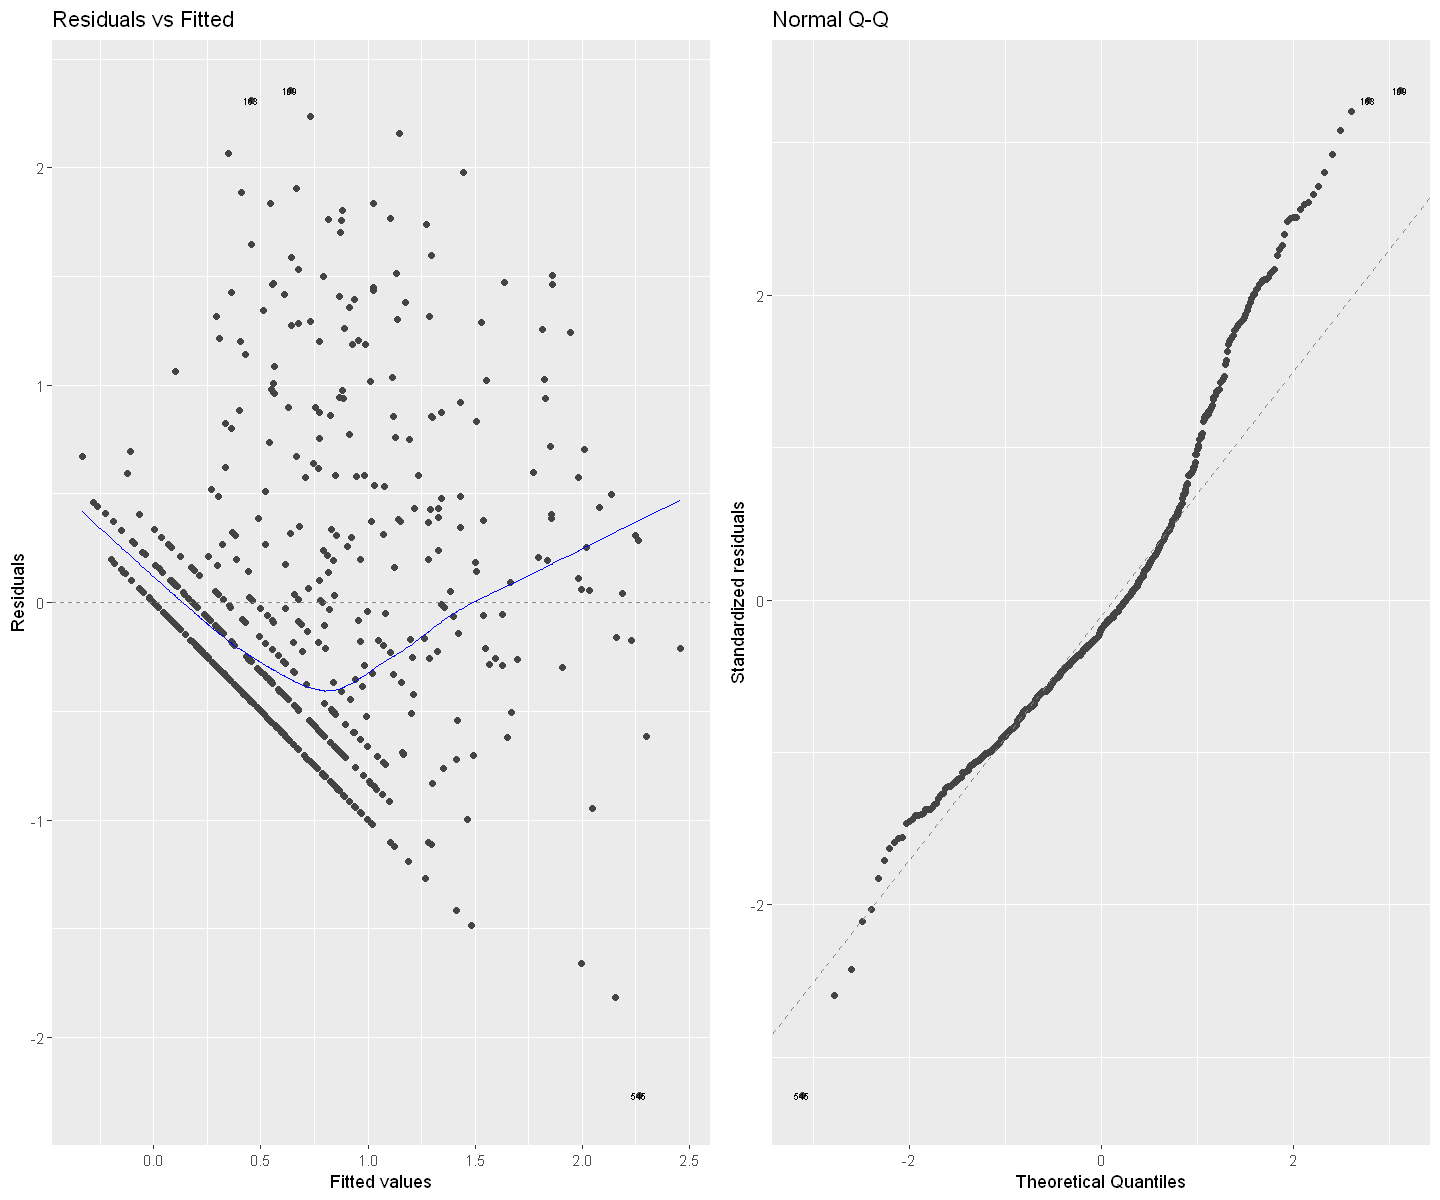

In [50]:
options(repr.plot.width = 12, repr.plot.height = 10)
autoplot(lin.reg.log,which=c(1,2),label.size=2)    

### 1.2. Linear regression without variable selection, applying to the `rain` reponse

In [51]:
lin.reg = lm(rain ~ ., data = train_set[,c(exp_var, "rain")])
summary(lin.reg)


Call:
lm(formula = rain ~ ., data = train_set[, c(exp_var, "rain")])

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6959 -2.1731 -0.7763  0.6184 23.7098 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.496821   0.769383   4.545 6.83e-06 ***
month02       -0.005935   0.842006  -0.007  0.99438    
month03       -0.145339   0.874463  -0.166  0.86806    
month04       -2.075335   0.917442  -2.262  0.02410 *  
month05       -2.032071   1.101578  -1.845  0.06565 .  
month06       -1.431166   1.198744  -1.194  0.23306    
month07       -1.937121   1.248372  -1.552  0.12133    
month08       -1.611029   1.259944  -1.279  0.20159    
month09       -2.018604   1.132818  -1.782  0.07534 .  
month10       -1.319620   1.031220  -1.280  0.20123    
month11       -0.024249   0.900159  -0.027  0.97852    
month12        0.028188   0.865967   0.033  0.97405    
ff             0.709571   0.710825   0.998  0.31863    
t            -10.249199   6.636738  -

#### Training error

In [52]:
# Mean Square Error
mean(lin.reg$residual**2)

[1] 14.45904

In [53]:
MAPE(lin.reg$fitted.values, y_train)

[1] 1.169383

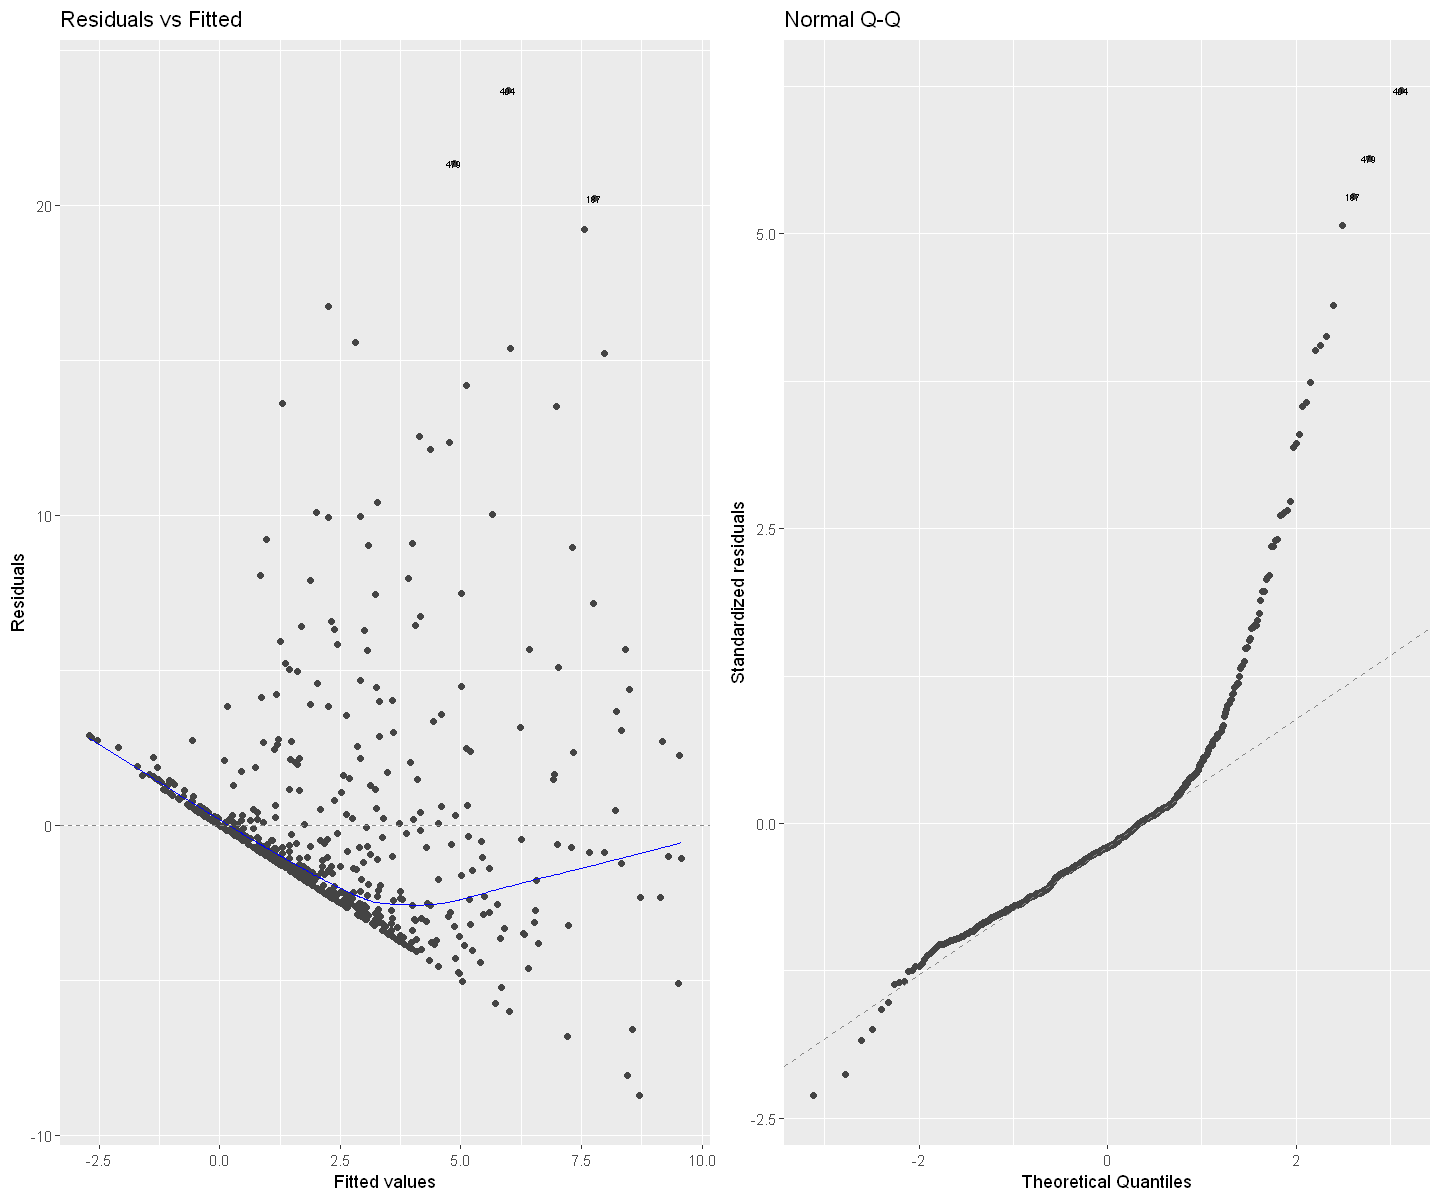

In [54]:
options(repr.plot.width = 12, repr.plot.height = 10)
autoplot(lin.reg,which=c(1,2),label.size=2)    

#### Test error

In [55]:
MAPE(predict(lin.reg, newdata = test_set), y_test)
MSE(predict(lin.reg, newdata = test_set), y_test)

[1] 1.21924

[1] 21.31253

We can see that, in the test set, the MAPE is smaller in linear regression with `rain` reponse than `rain_log`, but MSE is greater.

## 2. Variable selection

### 2.1 Variable selection for `rain_log` reponse

In [56]:
names(test_set[,c(exp_var, "rain_log")])

[1] "month"        "ff"           "t"            "td"           "hu"          
 [6] "dd"           "precip_log"   "ws_arome"     "p3031_arome"  "u10_arome"   
[11] "v10_arome"    "t2m_arome"    "d2m_arome"    "r_arome"      "tp_arome_log"
[16] "msl_arome"    "rain_log"

In [57]:
select.lin.reg.log <- regsubsets(rain_log ~., data = test_set[,c(exp_var, "rain_log")], nvmax=30, method="forward")
res.slr.log = summary(select.lin.reg.log)
res.slr.log

Subset selection object
Call: regsubsets.formula(rain_log ~ ., data = test_set[, c(exp_var, 
    "rain_log")], nvmax = 30, method = "forward")
26 Variables  (and intercept)
             Forced in Forced out
month02          FALSE      FALSE
month03          FALSE      FALSE
month04          FALSE      FALSE
month05          FALSE      FALSE
month06          FALSE      FALSE
month07          FALSE      FALSE
month08          FALSE      FALSE
month09          FALSE      FALSE
month10          FALSE      FALSE
month11          FALSE      FALSE
month12          FALSE      FALSE
ff               FALSE      FALSE
t                FALSE      FALSE
td               FALSE      FALSE
hu               FALSE      FALSE
dd               FALSE      FALSE
precip_log       FALSE      FALSE
ws_arome         FALSE      FALSE
p3031_arome      FALSE      FALSE
u10_arome        FALSE      FALSE
v10_arome        FALSE      FALSE
t2m_arome        FALSE      FALSE
d2m_arome        FALSE      FALSE
r_arome    

In [58]:
str(data.frame(AdjR2 = which.max(res.slr.log$adjr2), Cp = which.min(res.slr.log$cp), BIC = which.min(res.slr.log$bic) ))

'data.frame':	1 obs. of  3 variables:
 $ AdjR2: int 10
 $ Cp   : int 7
 $ BIC  : int 2


We retain 10, 7 and 2 variables for R2, Cp and BIC criterion respectively

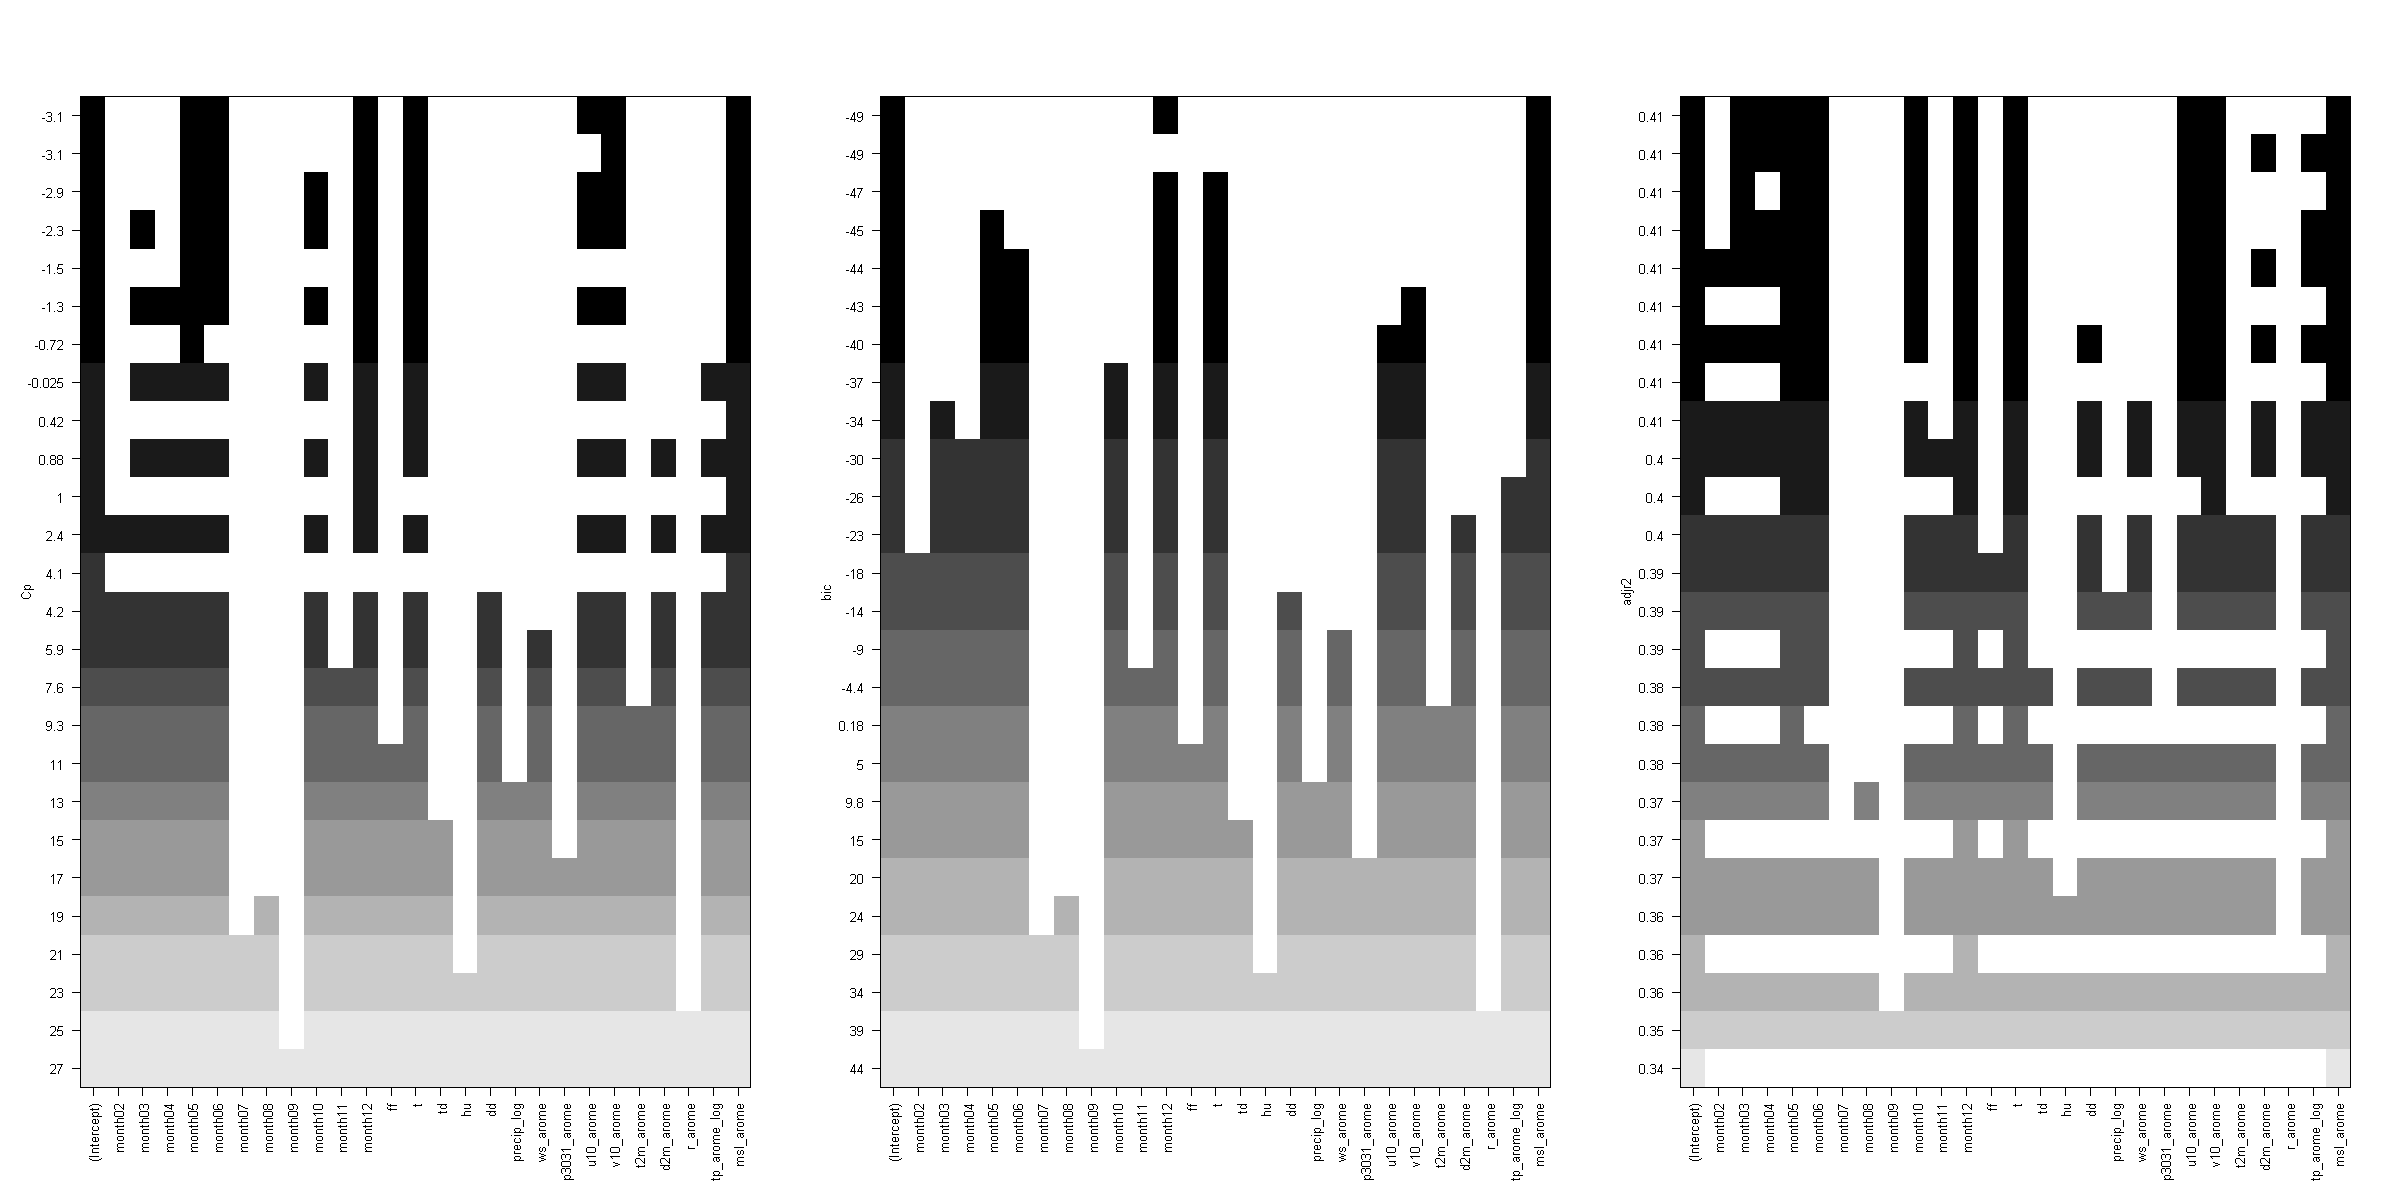

In [59]:
options(repr.plot.width = 20, repr.plot.height = 10)
par(mfrow = c(1,3))
plot(select.lin.reg.log, scale = "Cp")
plot(select.lin.reg.log, scale="bic")
plot(select.lin.reg.log, scale="adjr2")

By looking at these graphs, and considering the all 7 criterions, we decided to retain a linear model of 6 variables:
`month5`, `month6`, `month12`, `t`, `u10_arome`, `v10_arome` and `msl_arome`

In [60]:
retained.var.log = c("month5", "month6", "month12", "t", "u10_arome", "v10_arome", "msl_arome")

In this case, we used `month1` (Jan.) as the reference.

First, we need to add the `month5`, `month6` and `month12` variables to a dataset

In [61]:
# Create month5 and month6 variables as indicator so we consider them as quantitative variables
month5 = (month == '05')*rep(1, length(month))
month6 = (month == '06')*rep(1, length(month))
month12 = (month == '12')*rep(1, length(month))

# Add them to training set
train_set[,"month5"] = month5[train_i]
train_set[,"month6"] = month6[train_i]
train_set[,"month12"] = month12[train_i]

# Add them to test set
test_set[,"month5"] = month5[test_i]
test_set[,"month6"] = month6[test_i]
test_set[,"month12"] = month12[test_i]



#### Linear model for selected variables

In [62]:
selected.lin.reg.log = lm(rain_log ~ month5 + month6 + month12 + t + u10_arome + v10_arome + msl_arome, data = train_set[,c(retained.var.log, "rain_log")])
summary(selected.lin.reg.log)


Call:
lm(formula = rain_log ~ month5 + month6 + month12 + t + u10_arome + 
    v10_arome + msl_arome, data = train_set[, c(retained.var.log, 
    "rain_log")])

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0947 -0.4709 -0.1419  0.2765  2.6317 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.73154    0.03617  20.226  < 2e-16 ***
month5      -0.09941    0.11468  -0.867   0.3864    
month6       0.04232    0.11796   0.359   0.7199    
month12      0.20463    0.12251   1.670   0.0954 .  
t           -0.15157    0.03444  -4.402 1.29e-05 ***
u10_arome    0.17497    0.03425   5.108 4.51e-07 ***
v10_arome    0.16642    0.03451   4.822 1.84e-06 ***
msl_arome   -0.29712    0.03493  -8.505  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.731 on 542 degrees of freedom
Multiple R-squared:  0.3134,	Adjusted R-squared:  0.3046 
F-statistic: 35.35 on 7 and 542 DF,  p-value: < 2.2e-16


In [63]:
# MAPE of linear model with all variables, i.e training error
MAPE(lin.reg.log$fitted.values, y_train_log)
mean(lin.reg.log$residual**2)

# MAPE of linear model with selected variables, i.e training error
MAPE(selected.lin.reg.log$fitted.values, y_train_log)
mean(selected.lin.reg.log$residual**2)

[1] 1.288842

[1] 0.4935354

[1] 1.091296

[1] 0.5266118

#### Performance in test set

In [64]:
MAPE(to_rain(predict(lin.reg.log, newdata = test_set)), y_test)
MSE(to_rain(predict(lin.reg.log, newdata = test_set)), y_test)

MAPE(predict(lin.reg, newdata = test_set), y_test)
MSE(predict(lin.reg, newdata = test_set), y_test)

MAPE(to_rain(predict(selected.lin.reg.log, newdata = test_set)), y_test)
MSE(to_rain(predict(selected.lin.reg.log, newdata = test_set)), y_test)

[1] 40.02174

[1] 18.36314

[1] 1.21924

[1] 21.31253

[1] 8.09547

[1] 18.32691

Selected variables give a gain of performance in terms of test errors for MAPE but not MSE

# Question: linear model minimize $l2$ error, but here we use MAPE error?

In [65]:
selected.lin.reg = lm(rain ~ month5 + month6 + month12 + t + u10_arome + v10_arome + msl_arome, data = train_set[,c(retained.var.log, "rain")])
summary(selected.lin.reg)


Call:
lm(formula = rain ~ month5 + month6 + month12 + t + u10_arome + 
    v10_arome + msl_arome, data = train_set[, c(retained.var.log, 
    "rain")])

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5455 -1.9336 -0.7835  0.5689 24.9195 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.4014     0.1943  12.362  < 2e-16 ***
month5       -0.4629     0.6159  -0.752 0.452610    
month6        0.3747     0.6335   0.591 0.554440    
month12       0.5996     0.6579   0.911 0.362554    
t            -0.7685     0.1849  -4.155 3.78e-05 ***
u10_arome     0.6640     0.1840   3.610 0.000335 ***
v10_arome     0.9017     0.1853   4.865 1.50e-06 ***
msl_arome    -1.2079     0.1876  -6.438 2.66e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.926 on 542 degrees of freedom
Multiple R-squared:  0.2311,	Adjusted R-squared:  0.2212 
F-statistic: 23.27 on 7 and 542 DF,  p-value: < 2.2e-16


In [66]:
MAPE(selected.lin.reg$fitted.values, y_train)
mean(selected.lin.reg$residual**2)

MAPE(predict(selected.lin.reg, newdata = test_set), y_test)
MSE(predict(selected.lin.reg, newdata = test_set), y_test)

[1] 6.969846

[1] 15.18988

[1] 5.598872

[1] 19.99523

In [67]:
# df = data.frame(
#     n = (1:length(rain_lin.reg)) / 100.,
#     full_lm = as.vector(rain_lin.reg),
#     selected_lm = as.vector(rain_selected.lin.reg)
# )

In [68]:
# ggplot(data = df, aes(x = n)) + 
#     geom_point(aes(y = full_lm), color = "darkred") + 
#     geom_point(aes(y = selected_lm), color = "steelblue")

In [69]:
# options(repr.plot.width = 10, repr.plot.height = 6)
# ggplot() + 
#     geom_line(aes(x = 1:length(rain_lin.reg) ,y = rain_lin.reg), color = "red") + 
#     geom_line(aes(x = 1:length(rain_selected.lin.reg) ,y = rain_selected.lin.reg), color = "#13b913") + 
#     xlab("Time") + ylab("Rain falling") 

## 2. Linear regression with penalty - Rigde and Lasso

In [70]:
names(train_set)

[1] "month"        "ff"           "t"            "td"           "hu"          
 [6] "dd"           "precip_log"   "ws_arome"     "p3031_arome"  "u10_arome"   
[11] "v10_arome"    "t2m_arome"    "d2m_arome"    "r_arome"      "tp_arome_log"
[16] "msl_arome"    "rain"         "rain_class"   "rain_log"     "month5"      
[21] "month6"       "month12"

### 2.1. Rigde Regression 

We will fit a Rigde regression model using `glmnet` package, by varying the hyper-parameter `lambda` over a grid

In [71]:
head(train_set[,exp_var])

,month,ff,t,td,hu,dd,precip_log,ws_arome,p3031_arome,u10_arome,v10_arome,t2m_arome,d2m_arome,r_arome,tp_arome_log,msl_arome
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,06,-0.08621305,1.164777,0.9105351,-0.79823471,0.5200537,-0.82039852,-0.03659526,0.5297853,0.8019527,0.4007581,1.1187027,0.9208535,-0.69899841,-0.3621343,0.1533010
2,03,-0.21529566,-1.471529,-1.6613332,-0.45471837,0.6958876,0.07889537,-0.25766440,1.3231433,0.5568977,-0.8887086,-1.5527261,-1.5824152,0.18145591,0.3535131,-0.9054914
4,05,-1.46867996,0.129100,-0.1875101,-1.05685344,0.1290120,-0.82039852,-1.31752316,-0.8278199,-0.6050438,-0.6937063,0.2219311,-0.1249160,-1.14004178,-0.6698467,0.6887159
5,02,1.02840090,-1.238485,-1.4212403,-0.49103295,1.0222052,0.26943290,0.46462317,1.0634977,1.1864348,-0.7170438,-1.1660485,-1.3825454,-0.53032676,0.4926930,0.8759910
6,12,-1.46553799,-1.273800,-1.2888096,0.07576901,-0.8504800,-0.61244731,-1.27793928,-0.5881897,-0.4321987,0.1073955,-1.6551375,-1.7090362,0.05194278,-0.9410006,1.8945691
8,03,2.36216728,-1.243795,-1.3614883,-0.33792281,-2.0645970,-0.82039852,1.53127621,-2.0125623,-2.3869380,-1.7343155,-1.0988396,-1.2270086,-0.29023814,-1.0305921,0.4655751


In [73]:
lambda_seq = seq(0, 2, by = 0.1)

reg.ridge = glmnet(x = train_set[,exp_var], y = train_set[,"rain"], alpha = 0, lambda = lambda_seq, standardize = TRUE)
summary(reg.ridge)

We plot as below the regularisation paths, i.e the function $\lambda \mapsto \hat{\theta}_\text{ridge}(\lambda) $

In [ ]:
df.reg.rigde = data.frame(
  lambda = rep(reg.ridge$lambda,ncol(train_set[,exp_var])),
  theta = as.vector(t(reg.ridge$beta)),
  variables = rep(colnames(train_set[,exp_var]), each=length(reg.ridge$lambda))
  )

plt.ridge = ggplot(df.reg.rigde, aes(x = lambda, y = theta, col = variables))+
  geom_line() +
  theme(legend.position = "bottom") + theme_minimal()
ggplotly(plt.ridge)

Now we'll use the cross validation method in order to select the best $\lambda$ by MSE

In [ ]:
ridge_cv <- cv.glmnet(x = train_set[,exp_var], y = train_set[,"rain"], alpha = 0, lambda = lambda_seq, standardize = TRUE)
ridge_cv$lambda.min

So the best $\lambda$ is ...

In [ ]:
df = data.frame(
  lambda = ridge_cv$lambda,
  MSE = ridge_cv$cvm,
  cvup = ridge_cv$cvup,
  cvlo = ridge_cv$cvlo)

ggplot(df)+
  geom_line(aes(x=lambda, y=MSE))+
  geom_vline(xintercept = ridge_cv$lambda.min,col="red",linetype="dashed")+
  geom_line(aes(x=lambda,y=cvup),col="blue",linetype="dotted")+
  geom_line(aes(x=lambda,y=cvlo),col="blue",linetype="dotted")+
  xlim(c(0,ridge_cv$lambda.min+0.5))+
  theme_minimal()

In [ ]:
plt.ridge = plt.ridge + 
  geom_vline(xintercept = ridge_cv$lambda.min, color = "black", size=.8) +
  xlim(c(0,ridge_cv$lambda.min + 0.1))
ggplotly(plt.ridge)

### 2.2. Lasso Regression

The idea of LASSO (Least Absolute Selection and Shrinkage Operator) Regression is to try to cancel some coefficients of $\theta$ to have a sparse estimator. Mathematically, we add a $l_1$ constraint to our optimization problem.

We proceed this with the same approach as Ridge Regression, with a notice that `alpha = 1` means Lasso regression.

In [ ]:
lambda_seq = seq(0, 2, by = 0.1)
reg.lasso <- glmnet(x = train_set[,exp_var], y = train_set[,"rain"], alpha = 1, lambda = lambda_seq, standardize=TRUE)
summary(reg.lasso)

In [ ]:
df = data.frame(
  lambda = rep(reg.lasso$lambda, ncol(train_set[,exp_var])),
  theta = as.vector(t(reg.lasso$beta)),
  variables = rep(colnames(train_set[,exp_var]),each=length(reg.lasso$lambda))
  )

plt.lasso = ggplot(df,aes(x=lambda, y=theta, col=variables))+
  geom_line() +
  theme(legend.position="bottom") + theme_minimal()
ggplotly(plt.lasso)

In [ ]:
lasso_cv <- cv.glmnet(x = train_set[,exp_var], y = train_set[,"rain"], alpha=1, lambda=lambda_seq, standardize=TRUE)
lasso_cv$lambda.min

In [ ]:
df = data.frame(
  lambda=lasso_cv$lambda,
  MSE=lasso_cv$cvm,
  cvup=lasso_cv$cvup,
  cvlo=lasso_cv$cvlo)

ggplot(df)+
  geom_line(aes(x=lambda,y=MSE))+
  geom_vline(xintercept = lasso_cv$lambda.min,col="red",linetype="dashed")+
  geom_line(aes(x=lambda,y=cvup),col="blue",linetype="dotted")+
  geom_line(aes(x=lambda,y=cvlo),col="blue",linetype="dotted")+
  xlim(c(0,lasso_cv$lambda.min+0.5))+
  theme_minimal()

In [ ]:
plt.lasso = plt.lasso + 
  geom_vline(xintercept = lasso_cv$lambda.min, color = "black", size=.8)+
  xlim(c(0,lasso_cv$lambda.min+0.5))
ggplotly(plt.lasso)

### 2.3. Elastic-Net Regression

Elastic-Net regression combines the advantages of ridge regression and Lasso regression

In [ ]:
lambda_seq = seq(0, 2, by = 0.1)
reg.net <- glmnet(x = train_set[,exp_var], y = train_set[,"rain"], alpha=.5, lambda=lambda_seq, standardize=TRUE)
summary(reg.net)

In [ ]:
df = data.frame(
  lambda = rep(reg.net$lambda,ncol(tildeX)),
  theta = as.vector(t(reg.net$beta)),
  variables = rep(colnames(tildeX),each=length(reg.net$lambda))
  )

plt.net = ggplot(df,aes(x=lambda,y=theta,col=variables))+
  geom_line() +
  theme(legend.position="bottom") + theme_minimal()
ggplotly(plt.net)

In [ ]:
net_cv <- cv.glmnet(tildeX,tildeY, alpha=.5, lambda=lambda_seq, standardize=TRUE)
net_cv$lambda.min

In [ ]:
plt.net = plt.net + 
  geom_vline(xintercept = net_cv$lambda.min, color = "black", size=.8)+
  xlim(c(0,net_cv$lambda.min+0.2))
ggplotly(plt.net)

In [ ]:
tildeozone1 = as.data.frame(scale(ozone1,center=T,scale=T))
reg.lin = lm(maxO3~.,data=tildeozone1)

df = data.frame(
  x=rep(colnames(tildeX),4),
  coef=c(as.vector(reg.lin$coefficients[-1]),
         as.vector(coef(ridge_cv,s=ridge_cv$lambda.min)[-1]),
         as.vector(coef(lasso_cv)[-1]),
         as.vector(coef(net_cv)[-1])),
  reg=c(rep("reg.lin",ncol(tildeX)),
        rep("reg.ridge",ncol(tildeX)),
        rep("reg.lasso",ncol(tildeX)),
        rep("reg.ElasticNet",ncol(tildeX)))
  )

ggplot(df)+
  geom_point(aes(x=x,y=coef,col=reg,shape=reg))+
  theme_minimal()

## 3. Poisson Regression

Since the distribution of the `rain` reponse is very similar to a Poisson distribution, so we'll try to fit it with a poisson regression in this section 